In [14]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [15]:
yds = pan.read_csv("yds_data.csv")
yds.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [16]:
#cleaning the dataset
#removing the unnecessary columns
del_col = ['Unnamed: 0','remaining_min','power_of_shot','knockout_match','remaining_sec','type_of_combined_shot','type_of_shot',
          'home/away','shot_basics','area_of_shot','range_of_shot','shot_id_number','lat/lng','power_of_shot.1',
           'knockout_match.1','remaining_min.1','remaining_sec.1']

yds = yds.drop(del_col, axis=1)
yds.head()

,match_event_id,location_x,location_y,game_season,distance_of_shot,is_goal,team_name,date_of_game,match_id,team_id,distance_of_shot.1
0,10.0,167.0,72.0,2000-01,38.0,NaN,Manchester United,2000-10-31,20000012,1610612747,38.0
1,12.0,-157.0,0.0,2000-01,35.0,0.0,Manchester United,2000-10-31,20000012,1610612747,35.0
2,35.0,-101.0,135.0,2000-01,36.0,1.0,Manchester United,2000-10-31,20000012,1610612747,54.4
3,43.0,138.0,175.0,2000-01,42.0,0.0,Manchester United,2000-10-31,20000012,1610612747,42.0
4,155.0,0.0,0.0,2000-01,20.0,1.0,NaN,2000-10-31,20000012,1610612747,20.0


In [17]:
#  dropping the duplicates from the dataset.
print(yds.shape)
yds = yds.drop_duplicates(keep='first')
print(yds.shape)

(30697, 11)
(30695, 11)


In [19]:
# replacing all the zeros
cols = ['location_x','location_y','is_goal']
yds[cols] = yds[cols].replace(0, npy.nan)

In [20]:
yds.head()

,match_event_id,location_x,location_y,game_season,distance_of_shot,is_goal,team_name,date_of_game,match_id,team_id,distance_of_shot.1
0,10.0,167.0,72.0,2000-01,38.0,NaN,Manchester United,2000-10-31,20000012,1610612747,38.0
1,12.0,-157.0,NaN,2000-01,35.0,NaN,Manchester United,2000-10-31,20000012,1610612747,35.0
2,35.0,-101.0,135.0,2000-01,36.0,1.0,Manchester United,2000-10-31,20000012,1610612747,54.4
3,43.0,138.0,175.0,2000-01,42.0,NaN,Manchester United,2000-10-31,20000012,1610612747,42.0
4,155.0,NaN,NaN,2000-01,20.0,1.0,NaN,2000-10-31,20000012,1610612747,20.0


In [21]:
#1.changing the column name
columns_name = yds.columns.values
columns_name[0] = 'match_id'

In [22]:
yds.head()

,match_id,location_x,location_y,game_season,distance_of_shot,is_goal,team_name,date_of_game,match_id,team_id,distance_of_shot.1
0,10.0,167.0,72.0,2000-01,38.0,NaN,Manchester United,2000-10-31,20000012,1610612747,38.0
1,12.0,-157.0,NaN,2000-01,35.0,NaN,Manchester United,2000-10-31,20000012,1610612747,35.0
2,35.0,-101.0,135.0,2000-01,36.0,1.0,Manchester United,2000-10-31,20000012,1610612747,54.4
3,43.0,138.0,175.0,2000-01,42.0,NaN,Manchester United,2000-10-31,20000012,1610612747,42.0
4,155.0,NaN,NaN,2000-01,20.0,1.0,NaN,2000-10-31,20000012,1610612747,20.0


In [23]:
#2.Count total NaN at each column in DataFrame
yds.isnull().sum()

match_id               1561
location_x             6654
location_y             6862
game_season            5862
distance_of_shot       1567
is_goal               19817
team_name              1535
date_of_game           1550
match_id                  0
team_id                   0
distance_of_shot.1     1568
dtype: int64

In [25]:
#3.Count total NaN at each row in DataFrame
for i in range(len(yds.index)) :
    print("NaN in rows",i,":",yds.iloc[i].isnull().sum())

NaN in rows 0 : 1
NaN in rows 1 : 2
NaN in rows 2 : 0
NaN in rows 3 : 1
NaN in rows 4 : 3
NaN in rows 5 : 2
NaN in rows 6 : 2
NaN in rows 7 : 1
NaN in rows 8 : 1
NaN in rows 9 : 3
NaN in rows 10 : 1
NaN in rows 11 : 0
NaN in rows 12 : 3
NaN in rows 13 : 1
NaN in rows 14 : 1
NaN in rows 15 : 2
NaN in rows 16 : 3
NaN in rows 17 : 1
NaN in rows 18 : 2
NaN in rows 19 : 4
NaN in rows 20 : 1
NaN in rows 21 : 2
NaN in rows 22 : 0
NaN in rows 23 : 1
NaN in rows 24 : 0
NaN in rows 25 : 3
NaN in rows 26 : 2
NaN in rows 27 : 1
NaN in rows 28 : 1
NaN in rows 29 : 1
NaN in rows 30 : 1
NaN in rows 31 : 2
NaN in rows 32 : 1
NaN in rows 33 : 1
NaN in rows 34 : 1
NaN in rows 35 : 2
NaN in rows 36 : 1
NaN in rows 37 : 3
NaN in rows 38 : 0
NaN in rows 39 : 0
NaN in rows 40 : 1
NaN in rows 41 : 0
NaN in rows 42 : 0
NaN in rows 43 : 2
NaN in rows 44 : 1
NaN in rows 45 : 0
NaN in rows 46 : 4
NaN in rows 47 : 1
NaN in rows 48 : 0
NaN in rows 49 : 1
NaN in rows 50 : 2
NaN in rows 51 : 2
NaN in rows 52 : 1
NaN

NaN in rows 522 : 1
NaN in rows 523 : 1
NaN in rows 524 : 2
NaN in rows 525 : 2
NaN in rows 526 : 2
NaN in rows 527 : 2
NaN in rows 528 : 1
NaN in rows 529 : 1
NaN in rows 530 : 2
NaN in rows 531 : 1
NaN in rows 532 : 1
NaN in rows 533 : 1
NaN in rows 534 : 0
NaN in rows 535 : 3
NaN in rows 536 : 2
NaN in rows 537 : 2
NaN in rows 538 : 2
NaN in rows 539 : 0
NaN in rows 540 : 2
NaN in rows 541 : 2
NaN in rows 542 : 2
NaN in rows 543 : 3
NaN in rows 544 : 1
NaN in rows 545 : 1
NaN in rows 546 : 1
NaN in rows 547 : 1
NaN in rows 548 : 2
NaN in rows 549 : 1
NaN in rows 550 : 0
NaN in rows 551 : 1
NaN in rows 552 : 0
NaN in rows 553 : 2
NaN in rows 554 : 4
NaN in rows 555 : 2
NaN in rows 556 : 1
NaN in rows 557 : 2
NaN in rows 558 : 3
NaN in rows 559 : 1
NaN in rows 560 : 3
NaN in rows 561 : 1
NaN in rows 562 : 2
NaN in rows 563 : 1
NaN in rows 564 : 1
NaN in rows 565 : 2
NaN in rows 566 : 1
NaN in rows 567 : 1
NaN in rows 568 : 2
NaN in rows 569 : 2
NaN in rows 570 : 5
NaN in rows 571 : 4


NaN in rows 1041 : 0
NaN in rows 1042 : 1
NaN in rows 1043 : 1
NaN in rows 1044 : 1
NaN in rows 1045 : 1
NaN in rows 1046 : 2
NaN in rows 1047 : 4
NaN in rows 1048 : 1
NaN in rows 1049 : 3
NaN in rows 1050 : 4
NaN in rows 1051 : 3
NaN in rows 1052 : 1
NaN in rows 1053 : 2
NaN in rows 1054 : 1
NaN in rows 1055 : 1
NaN in rows 1056 : 1
NaN in rows 1057 : 1
NaN in rows 1058 : 1
NaN in rows 1059 : 1
NaN in rows 1060 : 1
NaN in rows 1061 : 5
NaN in rows 1062 : 1
NaN in rows 1063 : 1
NaN in rows 1064 : 3
NaN in rows 1065 : 1
NaN in rows 1066 : 2
NaN in rows 1067 : 0
NaN in rows 1068 : 1
NaN in rows 1069 : 0
NaN in rows 1070 : 3
NaN in rows 1071 : 1
NaN in rows 1072 : 0
NaN in rows 1073 : 2
NaN in rows 1074 : 1
NaN in rows 1075 : 2
NaN in rows 1076 : 3
NaN in rows 1077 : 2
NaN in rows 1078 : 1
NaN in rows 1079 : 3
NaN in rows 1080 : 2
NaN in rows 1081 : 3
NaN in rows 1082 : 0
NaN in rows 1083 : 1
NaN in rows 1084 : 3
NaN in rows 1085 : 1
NaN in rows 1086 : 1
NaN in rows 1087 : 4
NaN in rows 1

NaN in rows 1493 : 1
NaN in rows 1494 : 3
NaN in rows 1495 : 0
NaN in rows 1496 : 1
NaN in rows 1497 : 1
NaN in rows 1498 : 0
NaN in rows 1499 : 3
NaN in rows 1500 : 2
NaN in rows 1501 : 2
NaN in rows 1502 : 1
NaN in rows 1503 : 1
NaN in rows 1504 : 3
NaN in rows 1505 : 1
NaN in rows 1506 : 3
NaN in rows 1507 : 2
NaN in rows 1508 : 1
NaN in rows 1509 : 3
NaN in rows 1510 : 1
NaN in rows 1511 : 1
NaN in rows 1512 : 2
NaN in rows 1513 : 1
NaN in rows 1514 : 1
NaN in rows 1515 : 3
NaN in rows 1516 : 0
NaN in rows 1517 : 2
NaN in rows 1518 : 4
NaN in rows 1519 : 2
NaN in rows 1520 : 2
NaN in rows 1521 : 4
NaN in rows 1522 : 2
NaN in rows 1523 : 1
NaN in rows 1524 : 2
NaN in rows 1525 : 3
NaN in rows 1526 : 2
NaN in rows 1527 : 4
NaN in rows 1528 : 1
NaN in rows 1529 : 2
NaN in rows 1530 : 0
NaN in rows 1531 : 1
NaN in rows 1532 : 3
NaN in rows 1533 : 2
NaN in rows 1534 : 0
NaN in rows 1535 : 2
NaN in rows 1536 : 1
NaN in rows 1537 : 3
NaN in rows 1538 : 1
NaN in rows 1539 : 1
NaN in rows 1

NaN in rows 1886 : 0
NaN in rows 1887 : 2
NaN in rows 1888 : 0
NaN in rows 1889 : 2
NaN in rows 1890 : 1
NaN in rows 1891 : 1
NaN in rows 1892 : 1
NaN in rows 1893 : 2
NaN in rows 1894 : 3
NaN in rows 1895 : 2
NaN in rows 1896 : 1
NaN in rows 1897 : 0
NaN in rows 1898 : 1
NaN in rows 1899 : 1
NaN in rows 1900 : 0
NaN in rows 1901 : 1
NaN in rows 1902 : 3
NaN in rows 1903 : 0
NaN in rows 1904 : 1
NaN in rows 1905 : 1
NaN in rows 1906 : 1
NaN in rows 1907 : 2
NaN in rows 1908 : 1
NaN in rows 1909 : 1
NaN in rows 1910 : 1
NaN in rows 1911 : 3
NaN in rows 1912 : 2
NaN in rows 1913 : 3
NaN in rows 1914 : 3
NaN in rows 1915 : 1
NaN in rows 1916 : 3
NaN in rows 1917 : 2
NaN in rows 1918 : 2
NaN in rows 1919 : 1
NaN in rows 1920 : 1
NaN in rows 1921 : 2
NaN in rows 1922 : 4
NaN in rows 1923 : 3
NaN in rows 1924 : 0
NaN in rows 1925 : 1
NaN in rows 1926 : 1
NaN in rows 1927 : 0
NaN in rows 1928 : 1
NaN in rows 1929 : 2
NaN in rows 1930 : 1
NaN in rows 1931 : 1
NaN in rows 1932 : 2
NaN in rows 1

NaN in rows 2383 : 1
NaN in rows 2384 : 3
NaN in rows 2385 : 1
NaN in rows 2386 : 2
NaN in rows 2387 : 3
NaN in rows 2388 : 2
NaN in rows 2389 : 2
NaN in rows 2390 : 1
NaN in rows 2391 : 3
NaN in rows 2392 : 1
NaN in rows 2393 : 4
NaN in rows 2394 : 1
NaN in rows 2395 : 2
NaN in rows 2396 : 1
NaN in rows 2397 : 2
NaN in rows 2398 : 2
NaN in rows 2399 : 2
NaN in rows 2400 : 3
NaN in rows 2401 : 4
NaN in rows 2402 : 2
NaN in rows 2403 : 1
NaN in rows 2404 : 4
NaN in rows 2405 : 1
NaN in rows 2406 : 1
NaN in rows 2407 : 3
NaN in rows 2408 : 2
NaN in rows 2409 : 4
NaN in rows 2410 : 1
NaN in rows 2411 : 0
NaN in rows 2412 : 1
NaN in rows 2413 : 3
NaN in rows 2414 : 1
NaN in rows 2415 : 2
NaN in rows 2416 : 2
NaN in rows 2417 : 5
NaN in rows 2418 : 3
NaN in rows 2419 : 0
NaN in rows 2420 : 3
NaN in rows 2421 : 2
NaN in rows 2422 : 2
NaN in rows 2423 : 1
NaN in rows 2424 : 2
NaN in rows 2425 : 2
NaN in rows 2426 : 2
NaN in rows 2427 : 0
NaN in rows 2428 : 1
NaN in rows 2429 : 2
NaN in rows 2

NaN in rows 2895 : 0
NaN in rows 2896 : 0
NaN in rows 2897 : 1
NaN in rows 2898 : 1
NaN in rows 2899 : 1
NaN in rows 2900 : 0
NaN in rows 2901 : 1
NaN in rows 2902 : 2
NaN in rows 2903 : 3
NaN in rows 2904 : 1
NaN in rows 2905 : 0
NaN in rows 2906 : 1
NaN in rows 2907 : 1
NaN in rows 2908 : 0
NaN in rows 2909 : 1
NaN in rows 2910 : 3
NaN in rows 2911 : 4
NaN in rows 2912 : 3
NaN in rows 2913 : 3
NaN in rows 2914 : 1
NaN in rows 2915 : 1
NaN in rows 2916 : 2
NaN in rows 2917 : 3
NaN in rows 2918 : 2
NaN in rows 2919 : 1
NaN in rows 2920 : 1
NaN in rows 2921 : 1
NaN in rows 2922 : 1
NaN in rows 2923 : 2
NaN in rows 2924 : 1
NaN in rows 2925 : 1
NaN in rows 2926 : 3
NaN in rows 2927 : 1
NaN in rows 2928 : 1
NaN in rows 2929 : 1
NaN in rows 2930 : 1
NaN in rows 2931 : 0
NaN in rows 2932 : 3
NaN in rows 2933 : 0
NaN in rows 2934 : 3
NaN in rows 2935 : 2
NaN in rows 2936 : 1
NaN in rows 2937 : 2
NaN in rows 2938 : 2
NaN in rows 2939 : 1
NaN in rows 2940 : 3
NaN in rows 2941 : 2
NaN in rows 2

NaN in rows 3319 : 3
NaN in rows 3320 : 1
NaN in rows 3321 : 3
NaN in rows 3322 : 3
NaN in rows 3323 : 1
NaN in rows 3324 : 4
NaN in rows 3325 : 1
NaN in rows 3326 : 1
NaN in rows 3327 : 0
NaN in rows 3328 : 1
NaN in rows 3329 : 1
NaN in rows 3330 : 1
NaN in rows 3331 : 3
NaN in rows 3332 : 1
NaN in rows 3333 : 1
NaN in rows 3334 : 1
NaN in rows 3335 : 0
NaN in rows 3336 : 1
NaN in rows 3337 : 2
NaN in rows 3338 : 2
NaN in rows 3339 : 3
NaN in rows 3340 : 2
NaN in rows 3341 : 2
NaN in rows 3342 : 1
NaN in rows 3343 : 2
NaN in rows 3344 : 2
NaN in rows 3345 : 3
NaN in rows 3346 : 2
NaN in rows 3347 : 2
NaN in rows 3348 : 1
NaN in rows 3349 : 3
NaN in rows 3350 : 1
NaN in rows 3351 : 2
NaN in rows 3352 : 2
NaN in rows 3353 : 1
NaN in rows 3354 : 2
NaN in rows 3355 : 0
NaN in rows 3356 : 3
NaN in rows 3357 : 2
NaN in rows 3358 : 1
NaN in rows 3359 : 2
NaN in rows 3360 : 0
NaN in rows 3361 : 1
NaN in rows 3362 : 0
NaN in rows 3363 : 0
NaN in rows 3364 : 0
NaN in rows 3365 : 1
NaN in rows 3

NaN in rows 3712 : 1
NaN in rows 3713 : 1
NaN in rows 3714 : 2
NaN in rows 3715 : 2
NaN in rows 3716 : 3
NaN in rows 3717 : 1
NaN in rows 3718 : 1
NaN in rows 3719 : 3
NaN in rows 3720 : 2
NaN in rows 3721 : 2
NaN in rows 3722 : 1
NaN in rows 3723 : 1
NaN in rows 3724 : 1
NaN in rows 3725 : 1
NaN in rows 3726 : 1
NaN in rows 3727 : 0
NaN in rows 3728 : 2
NaN in rows 3729 : 1
NaN in rows 3730 : 2
NaN in rows 3731 : 0
NaN in rows 3732 : 1
NaN in rows 3733 : 1
NaN in rows 3734 : 2
NaN in rows 3735 : 1
NaN in rows 3736 : 0
NaN in rows 3737 : 3
NaN in rows 3738 : 1
NaN in rows 3739 : 1
NaN in rows 3740 : 1
NaN in rows 3741 : 2
NaN in rows 3742 : 0
NaN in rows 3743 : 3
NaN in rows 3744 : 0
NaN in rows 3745 : 1
NaN in rows 3746 : 3
NaN in rows 3747 : 4
NaN in rows 3748 : 1
NaN in rows 3749 : 1
NaN in rows 3750 : 0
NaN in rows 3751 : 1
NaN in rows 3752 : 2
NaN in rows 3753 : 3
NaN in rows 3754 : 2
NaN in rows 3755 : 0
NaN in rows 3756 : 2
NaN in rows 3757 : 1
NaN in rows 3758 : 3
NaN in rows 3

NaN in rows 4199 : 0
NaN in rows 4200 : 2
NaN in rows 4201 : 1
NaN in rows 4202 : 2
NaN in rows 4203 : 1
NaN in rows 4204 : 1
NaN in rows 4205 : 1
NaN in rows 4206 : 1
NaN in rows 4207 : 0
NaN in rows 4208 : 1
NaN in rows 4209 : 1
NaN in rows 4210 : 1
NaN in rows 4211 : 0
NaN in rows 4212 : 4
NaN in rows 4213 : 0
NaN in rows 4214 : 0
NaN in rows 4215 : 0
NaN in rows 4216 : 1
NaN in rows 4217 : 3
NaN in rows 4218 : 1
NaN in rows 4219 : 2
NaN in rows 4220 : 1
NaN in rows 4221 : 1
NaN in rows 4222 : 1
NaN in rows 4223 : 1
NaN in rows 4224 : 1
NaN in rows 4225 : 3
NaN in rows 4226 : 1
NaN in rows 4227 : 1
NaN in rows 4228 : 1
NaN in rows 4229 : 0
NaN in rows 4230 : 1
NaN in rows 4231 : 0
NaN in rows 4232 : 0
NaN in rows 4233 : 1
NaN in rows 4234 : 1
NaN in rows 4235 : 2
NaN in rows 4236 : 3
NaN in rows 4237 : 3
NaN in rows 4238 : 1
NaN in rows 4239 : 0
NaN in rows 4240 : 0
NaN in rows 4241 : 2
NaN in rows 4242 : 0
NaN in rows 4243 : 1
NaN in rows 4244 : 1
NaN in rows 4245 : 4
NaN in rows 4

NaN in rows 4619 : 2
NaN in rows 4620 : 2
NaN in rows 4621 : 1
NaN in rows 4622 : 2
NaN in rows 4623 : 1
NaN in rows 4624 : 3
NaN in rows 4625 : 3
NaN in rows 4626 : 1
NaN in rows 4627 : 2
NaN in rows 4628 : 1
NaN in rows 4629 : 2
NaN in rows 4630 : 1
NaN in rows 4631 : 1
NaN in rows 4632 : 0
NaN in rows 4633 : 2
NaN in rows 4634 : 2
NaN in rows 4635 : 2
NaN in rows 4636 : 1
NaN in rows 4637 : 2
NaN in rows 4638 : 0
NaN in rows 4639 : 1
NaN in rows 4640 : 2
NaN in rows 4641 : 1
NaN in rows 4642 : 1
NaN in rows 4643 : 1
NaN in rows 4644 : 2
NaN in rows 4645 : 2
NaN in rows 4646 : 2
NaN in rows 4647 : 0
NaN in rows 4648 : 3
NaN in rows 4649 : 2
NaN in rows 4650 : 0
NaN in rows 4651 : 1
NaN in rows 4652 : 3
NaN in rows 4653 : 0
NaN in rows 4654 : 2
NaN in rows 4655 : 0
NaN in rows 4656 : 2
NaN in rows 4657 : 4
NaN in rows 4658 : 1
NaN in rows 4659 : 1
NaN in rows 4660 : 1
NaN in rows 4661 : 5
NaN in rows 4662 : 1
NaN in rows 4663 : 2
NaN in rows 4664 : 1
NaN in rows 4665 : 1
NaN in rows 4

NaN in rows 5127 : 2
NaN in rows 5128 : 1
NaN in rows 5129 : 4
NaN in rows 5130 : 3
NaN in rows 5131 : 2
NaN in rows 5132 : 0
NaN in rows 5133 : 1
NaN in rows 5134 : 1
NaN in rows 5135 : 2
NaN in rows 5136 : 3
NaN in rows 5137 : 1
NaN in rows 5138 : 1
NaN in rows 5139 : 1
NaN in rows 5140 : 3
NaN in rows 5141 : 1
NaN in rows 5142 : 1
NaN in rows 5143 : 2
NaN in rows 5144 : 1
NaN in rows 5145 : 2
NaN in rows 5146 : 4
NaN in rows 5147 : 3
NaN in rows 5148 : 3
NaN in rows 5149 : 2
NaN in rows 5150 : 4
NaN in rows 5151 : 1
NaN in rows 5152 : 1
NaN in rows 5153 : 0
NaN in rows 5154 : 0
NaN in rows 5155 : 1
NaN in rows 5156 : 2
NaN in rows 5157 : 0
NaN in rows 5158 : 1
NaN in rows 5159 : 0
NaN in rows 5160 : 2
NaN in rows 5161 : 1
NaN in rows 5162 : 2
NaN in rows 5163 : 1
NaN in rows 5164 : 1
NaN in rows 5165 : 0
NaN in rows 5166 : 1
NaN in rows 5167 : 3
NaN in rows 5168 : 1
NaN in rows 5169 : 0
NaN in rows 5170 : 1
NaN in rows 5171 : 2
NaN in rows 5172 : 1
NaN in rows 5173 : 2
NaN in rows 5

NaN in rows 5651 : 1
NaN in rows 5652 : 1
NaN in rows 5653 : 4
NaN in rows 5654 : 2
NaN in rows 5655 : 1
NaN in rows 5656 : 1
NaN in rows 5657 : 3
NaN in rows 5658 : 3
NaN in rows 5659 : 1
NaN in rows 5660 : 2
NaN in rows 5661 : 1
NaN in rows 5662 : 2
NaN in rows 5663 : 4
NaN in rows 5664 : 1
NaN in rows 5665 : 1
NaN in rows 5666 : 2
NaN in rows 5667 : 2
NaN in rows 5668 : 3
NaN in rows 5669 : 2
NaN in rows 5670 : 2
NaN in rows 5671 : 3
NaN in rows 5672 : 1
NaN in rows 5673 : 1
NaN in rows 5674 : 1
NaN in rows 5675 : 1
NaN in rows 5676 : 2
NaN in rows 5677 : 2
NaN in rows 5678 : 1
NaN in rows 5679 : 4
NaN in rows 5680 : 2
NaN in rows 5681 : 1
NaN in rows 5682 : 1
NaN in rows 5683 : 1
NaN in rows 5684 : 2
NaN in rows 5685 : 2
NaN in rows 5686 : 1
NaN in rows 5687 : 4
NaN in rows 5688 : 1
NaN in rows 5689 : 3
NaN in rows 5690 : 3
NaN in rows 5691 : 1
NaN in rows 5692 : 2
NaN in rows 5693 : 3
NaN in rows 5694 : 2
NaN in rows 5695 : 4
NaN in rows 5696 : 3
NaN in rows 5697 : 1
NaN in rows 5

NaN in rows 6173 : 1
NaN in rows 6174 : 4
NaN in rows 6175 : 1
NaN in rows 6176 : 1
NaN in rows 6177 : 2
NaN in rows 6178 : 2
NaN in rows 6179 : 0
NaN in rows 6180 : 0
NaN in rows 6181 : 1
NaN in rows 6182 : 2
NaN in rows 6183 : 1
NaN in rows 6184 : 3
NaN in rows 6185 : 4
NaN in rows 6186 : 2
NaN in rows 6187 : 1
NaN in rows 6188 : 3
NaN in rows 6189 : 3
NaN in rows 6190 : 1
NaN in rows 6191 : 1
NaN in rows 6192 : 1
NaN in rows 6193 : 0
NaN in rows 6194 : 1
NaN in rows 6195 : 1
NaN in rows 6196 : 1
NaN in rows 6197 : 0
NaN in rows 6198 : 1
NaN in rows 6199 : 0
NaN in rows 6200 : 1
NaN in rows 6201 : 1
NaN in rows 6202 : 0
NaN in rows 6203 : 2
NaN in rows 6204 : 3
NaN in rows 6205 : 1
NaN in rows 6206 : 1
NaN in rows 6207 : 3
NaN in rows 6208 : 1
NaN in rows 6209 : 1
NaN in rows 6210 : 1
NaN in rows 6211 : 3
NaN in rows 6212 : 0
NaN in rows 6213 : 0
NaN in rows 6214 : 4
NaN in rows 6215 : 1
NaN in rows 6216 : 2
NaN in rows 6217 : 1
NaN in rows 6218 : 0
NaN in rows 6219 : 1
NaN in rows 6

NaN in rows 6652 : 2
NaN in rows 6653 : 2
NaN in rows 6654 : 2
NaN in rows 6655 : 2
NaN in rows 6656 : 1
NaN in rows 6657 : 2
NaN in rows 6658 : 2
NaN in rows 6659 : 0
NaN in rows 6660 : 1
NaN in rows 6661 : 2
NaN in rows 6662 : 2
NaN in rows 6663 : 3
NaN in rows 6664 : 2
NaN in rows 6665 : 0
NaN in rows 6666 : 4
NaN in rows 6667 : 2
NaN in rows 6668 : 1
NaN in rows 6669 : 0
NaN in rows 6670 : 3
NaN in rows 6671 : 1
NaN in rows 6672 : 3
NaN in rows 6673 : 2
NaN in rows 6674 : 0
NaN in rows 6675 : 0
NaN in rows 6676 : 1
NaN in rows 6677 : 3
NaN in rows 6678 : 1
NaN in rows 6679 : 1
NaN in rows 6680 : 3
NaN in rows 6681 : 4
NaN in rows 6682 : 0
NaN in rows 6683 : 1
NaN in rows 6684 : 0
NaN in rows 6685 : 1
NaN in rows 6686 : 4
NaN in rows 6687 : 1
NaN in rows 6688 : 1
NaN in rows 6689 : 2
NaN in rows 6690 : 6
NaN in rows 6691 : 1
NaN in rows 6692 : 1
NaN in rows 6693 : 1
NaN in rows 6694 : 3
NaN in rows 6695 : 4
NaN in rows 6696 : 2
NaN in rows 6697 : 2
NaN in rows 6698 : 1
NaN in rows 6

NaN in rows 7166 : 2
NaN in rows 7167 : 1
NaN in rows 7168 : 0
NaN in rows 7169 : 3
NaN in rows 7170 : 2
NaN in rows 7171 : 0
NaN in rows 7172 : 1
NaN in rows 7173 : 1
NaN in rows 7174 : 2
NaN in rows 7175 : 1
NaN in rows 7176 : 4
NaN in rows 7177 : 1
NaN in rows 7178 : 1
NaN in rows 7179 : 1
NaN in rows 7180 : 0
NaN in rows 7181 : 2
NaN in rows 7182 : 2
NaN in rows 7183 : 4
NaN in rows 7184 : 1
NaN in rows 7185 : 4
NaN in rows 7186 : 2
NaN in rows 7187 : 2
NaN in rows 7188 : 1
NaN in rows 7189 : 2
NaN in rows 7190 : 2
NaN in rows 7191 : 2
NaN in rows 7192 : 1
NaN in rows 7193 : 1
NaN in rows 7194 : 2
NaN in rows 7195 : 0
NaN in rows 7196 : 1
NaN in rows 7197 : 2
NaN in rows 7198 : 2
NaN in rows 7199 : 2
NaN in rows 7200 : 1
NaN in rows 7201 : 1
NaN in rows 7202 : 2
NaN in rows 7203 : 2
NaN in rows 7204 : 1
NaN in rows 7205 : 0
NaN in rows 7206 : 1
NaN in rows 7207 : 2
NaN in rows 7208 : 2
NaN in rows 7209 : 3
NaN in rows 7210 : 2
NaN in rows 7211 : 2
NaN in rows 7212 : 2
NaN in rows 7

NaN in rows 7658 : 4
NaN in rows 7659 : 1
NaN in rows 7660 : 1
NaN in rows 7661 : 0
NaN in rows 7662 : 1
NaN in rows 7663 : 3
NaN in rows 7664 : 1
NaN in rows 7665 : 1
NaN in rows 7666 : 1
NaN in rows 7667 : 3
NaN in rows 7668 : 3
NaN in rows 7669 : 1
NaN in rows 7670 : 3
NaN in rows 7671 : 3
NaN in rows 7672 : 3
NaN in rows 7673 : 4
NaN in rows 7674 : 1
NaN in rows 7675 : 1
NaN in rows 7676 : 2
NaN in rows 7677 : 2
NaN in rows 7678 : 3
NaN in rows 7679 : 1
NaN in rows 7680 : 2
NaN in rows 7681 : 3
NaN in rows 7682 : 3
NaN in rows 7683 : 3
NaN in rows 7684 : 2
NaN in rows 7685 : 1
NaN in rows 7686 : 1
NaN in rows 7687 : 4
NaN in rows 7688 : 3
NaN in rows 7689 : 1
NaN in rows 7690 : 3
NaN in rows 7691 : 1
NaN in rows 7692 : 3
NaN in rows 7693 : 3
NaN in rows 7694 : 2
NaN in rows 7695 : 0
NaN in rows 7696 : 1
NaN in rows 7697 : 2
NaN in rows 7698 : 1
NaN in rows 7699 : 3
NaN in rows 7700 : 0
NaN in rows 7701 : 4
NaN in rows 7702 : 1
NaN in rows 7703 : 3
NaN in rows 7704 : 2
NaN in rows 7

NaN in rows 8083 : 2
NaN in rows 8084 : 1
NaN in rows 8085 : 3
NaN in rows 8086 : 0
NaN in rows 8087 : 1
NaN in rows 8088 : 1
NaN in rows 8089 : 2
NaN in rows 8090 : 2
NaN in rows 8091 : 1
NaN in rows 8092 : 2
NaN in rows 8093 : 1
NaN in rows 8094 : 2
NaN in rows 8095 : 1
NaN in rows 8096 : 3
NaN in rows 8097 : 3
NaN in rows 8098 : 3
NaN in rows 8099 : 0
NaN in rows 8100 : 1
NaN in rows 8101 : 3
NaN in rows 8102 : 3
NaN in rows 8103 : 4
NaN in rows 8104 : 1
NaN in rows 8105 : 2
NaN in rows 8106 : 3
NaN in rows 8107 : 3
NaN in rows 8108 : 2
NaN in rows 8109 : 1
NaN in rows 8110 : 0
NaN in rows 8111 : 0
NaN in rows 8112 : 1
NaN in rows 8113 : 1
NaN in rows 8114 : 3
NaN in rows 8115 : 2
NaN in rows 8116 : 2
NaN in rows 8117 : 0
NaN in rows 8118 : 2
NaN in rows 8119 : 1
NaN in rows 8120 : 2
NaN in rows 8121 : 3
NaN in rows 8122 : 1
NaN in rows 8123 : 3
NaN in rows 8124 : 4
NaN in rows 8125 : 1
NaN in rows 8126 : 3
NaN in rows 8127 : 2
NaN in rows 8128 : 3
NaN in rows 8129 : 0
NaN in rows 8

NaN in rows 8594 : 1
NaN in rows 8595 : 0
NaN in rows 8596 : 0
NaN in rows 8597 : 1
NaN in rows 8598 : 2
NaN in rows 8599 : 5
NaN in rows 8600 : 2
NaN in rows 8601 : 3
NaN in rows 8602 : 2
NaN in rows 8603 : 3
NaN in rows 8604 : 0
NaN in rows 8605 : 1
NaN in rows 8606 : 1
NaN in rows 8607 : 1
NaN in rows 8608 : 2
NaN in rows 8609 : 0
NaN in rows 8610 : 1
NaN in rows 8611 : 1
NaN in rows 8612 : 1
NaN in rows 8613 : 1
NaN in rows 8614 : 1
NaN in rows 8615 : 3
NaN in rows 8616 : 1
NaN in rows 8617 : 3
NaN in rows 8618 : 1
NaN in rows 8619 : 2
NaN in rows 8620 : 3
NaN in rows 8621 : 3
NaN in rows 8622 : 3
NaN in rows 8623 : 2
NaN in rows 8624 : 2
NaN in rows 8625 : 1
NaN in rows 8626 : 3
NaN in rows 8627 : 1
NaN in rows 8628 : 0
NaN in rows 8629 : 1
NaN in rows 8630 : 2
NaN in rows 8631 : 1
NaN in rows 8632 : 1
NaN in rows 8633 : 3
NaN in rows 8634 : 2
NaN in rows 8635 : 1
NaN in rows 8636 : 2
NaN in rows 8637 : 2
NaN in rows 8638 : 2
NaN in rows 8639 : 3
NaN in rows 8640 : 1
NaN in rows 8

NaN in rows 9015 : 2
NaN in rows 9016 : 0
NaN in rows 9017 : 1
NaN in rows 9018 : 0
NaN in rows 9019 : 4
NaN in rows 9020 : 3
NaN in rows 9021 : 3
NaN in rows 9022 : 1
NaN in rows 9023 : 1
NaN in rows 9024 : 0
NaN in rows 9025 : 3
NaN in rows 9026 : 1
NaN in rows 9027 : 2
NaN in rows 9028 : 2
NaN in rows 9029 : 3
NaN in rows 9030 : 1
NaN in rows 9031 : 0
NaN in rows 9032 : 1
NaN in rows 9033 : 2
NaN in rows 9034 : 1
NaN in rows 9035 : 2
NaN in rows 9036 : 1
NaN in rows 9037 : 1
NaN in rows 9038 : 1
NaN in rows 9039 : 1
NaN in rows 9040 : 1
NaN in rows 9041 : 1
NaN in rows 9042 : 1
NaN in rows 9043 : 1
NaN in rows 9044 : 1
NaN in rows 9045 : 1
NaN in rows 9046 : 1
NaN in rows 9047 : 2
NaN in rows 9048 : 0
NaN in rows 9049 : 2
NaN in rows 9050 : 1
NaN in rows 9051 : 1
NaN in rows 9052 : 2
NaN in rows 9053 : 1
NaN in rows 9054 : 3
NaN in rows 9055 : 0
NaN in rows 9056 : 2
NaN in rows 9057 : 0
NaN in rows 9058 : 0
NaN in rows 9059 : 1
NaN in rows 9060 : 4
NaN in rows 9061 : 1
NaN in rows 9

NaN in rows 9427 : 1
NaN in rows 9428 : 3
NaN in rows 9429 : 1
NaN in rows 9430 : 1
NaN in rows 9431 : 1
NaN in rows 9432 : 0
NaN in rows 9433 : 3
NaN in rows 9434 : 1
NaN in rows 9435 : 1
NaN in rows 9436 : 3
NaN in rows 9437 : 1
NaN in rows 9438 : 2
NaN in rows 9439 : 3
NaN in rows 9440 : 1
NaN in rows 9441 : 1
NaN in rows 9442 : 3
NaN in rows 9443 : 1
NaN in rows 9444 : 3
NaN in rows 9445 : 2
NaN in rows 9446 : 4
NaN in rows 9447 : 2
NaN in rows 9448 : 1
NaN in rows 9449 : 1
NaN in rows 9450 : 2
NaN in rows 9451 : 2
NaN in rows 9452 : 0
NaN in rows 9453 : 2
NaN in rows 9454 : 0
NaN in rows 9455 : 1
NaN in rows 9456 : 2
NaN in rows 9457 : 1
NaN in rows 9458 : 2
NaN in rows 9459 : 0
NaN in rows 9460 : 1
NaN in rows 9461 : 2
NaN in rows 9462 : 0
NaN in rows 9463 : 2
NaN in rows 9464 : 0
NaN in rows 9465 : 0
NaN in rows 9466 : 2
NaN in rows 9467 : 1
NaN in rows 9468 : 2
NaN in rows 9469 : 0
NaN in rows 9470 : 1
NaN in rows 9471 : 2
NaN in rows 9472 : 2
NaN in rows 9473 : 2
NaN in rows 9

NaN in rows 9847 : 0
NaN in rows 9848 : 1
NaN in rows 9849 : 1
NaN in rows 9850 : 2
NaN in rows 9851 : 0
NaN in rows 9852 : 1
NaN in rows 9853 : 2
NaN in rows 9854 : 1
NaN in rows 9855 : 2
NaN in rows 9856 : 1
NaN in rows 9857 : 3
NaN in rows 9858 : 2
NaN in rows 9859 : 1
NaN in rows 9860 : 4
NaN in rows 9861 : 1
NaN in rows 9862 : 2
NaN in rows 9863 : 4
NaN in rows 9864 : 1
NaN in rows 9865 : 2
NaN in rows 9866 : 4
NaN in rows 9867 : 0
NaN in rows 9868 : 2
NaN in rows 9869 : 3
NaN in rows 9870 : 2
NaN in rows 9871 : 1
NaN in rows 9872 : 4
NaN in rows 9873 : 3
NaN in rows 9874 : 1
NaN in rows 9875 : 0
NaN in rows 9876 : 0
NaN in rows 9877 : 3
NaN in rows 9878 : 2
NaN in rows 9879 : 1
NaN in rows 9880 : 2
NaN in rows 9881 : 4
NaN in rows 9882 : 2
NaN in rows 9883 : 3
NaN in rows 9884 : 3
NaN in rows 9885 : 3
NaN in rows 9886 : 1
NaN in rows 9887 : 1
NaN in rows 9888 : 4
NaN in rows 9889 : 3
NaN in rows 9890 : 1
NaN in rows 9891 : 2
NaN in rows 9892 : 0
NaN in rows 9893 : 4
NaN in rows 9

NaN in rows 10353 : 2
NaN in rows 10354 : 3
NaN in rows 10355 : 2
NaN in rows 10356 : 1
NaN in rows 10357 : 2
NaN in rows 10358 : 1
NaN in rows 10359 : 0
NaN in rows 10360 : 1
NaN in rows 10361 : 1
NaN in rows 10362 : 1
NaN in rows 10363 : 2
NaN in rows 10364 : 2
NaN in rows 10365 : 2
NaN in rows 10366 : 1
NaN in rows 10367 : 3
NaN in rows 10368 : 0
NaN in rows 10369 : 1
NaN in rows 10370 : 3
NaN in rows 10371 : 1
NaN in rows 10372 : 2
NaN in rows 10373 : 1
NaN in rows 10374 : 0
NaN in rows 10375 : 1
NaN in rows 10376 : 2
NaN in rows 10377 : 2
NaN in rows 10378 : 2
NaN in rows 10379 : 1
NaN in rows 10380 : 1
NaN in rows 10381 : 1
NaN in rows 10382 : 2
NaN in rows 10383 : 5
NaN in rows 10384 : 1
NaN in rows 10385 : 3
NaN in rows 10386 : 1
NaN in rows 10387 : 2
NaN in rows 10388 : 3
NaN in rows 10389 : 2
NaN in rows 10390 : 1
NaN in rows 10391 : 1
NaN in rows 10392 : 1
NaN in rows 10393 : 3
NaN in rows 10394 : 1
NaN in rows 10395 : 3
NaN in rows 10396 : 1
NaN in rows 10397 : 1
NaN in row

NaN in rows 10738 : 4
NaN in rows 10739 : 0
NaN in rows 10740 : 3
NaN in rows 10741 : 1
NaN in rows 10742 : 2
NaN in rows 10743 : 2
NaN in rows 10744 : 1
NaN in rows 10745 : 2
NaN in rows 10746 : 0
NaN in rows 10747 : 0
NaN in rows 10748 : 0
NaN in rows 10749 : 1
NaN in rows 10750 : 1
NaN in rows 10751 : 2
NaN in rows 10752 : 1
NaN in rows 10753 : 2
NaN in rows 10754 : 0
NaN in rows 10755 : 0
NaN in rows 10756 : 1
NaN in rows 10757 : 1
NaN in rows 10758 : 5
NaN in rows 10759 : 0
NaN in rows 10760 : 2
NaN in rows 10761 : 1
NaN in rows 10762 : 1
NaN in rows 10763 : 1
NaN in rows 10764 : 1
NaN in rows 10765 : 1
NaN in rows 10766 : 3
NaN in rows 10767 : 1
NaN in rows 10768 : 0
NaN in rows 10769 : 1
NaN in rows 10770 : 1
NaN in rows 10771 : 0
NaN in rows 10772 : 1
NaN in rows 10773 : 2
NaN in rows 10774 : 2
NaN in rows 10775 : 2
NaN in rows 10776 : 1
NaN in rows 10777 : 1
NaN in rows 10778 : 1
NaN in rows 10779 : 3
NaN in rows 10780 : 1
NaN in rows 10781 : 1
NaN in rows 10782 : 1
NaN in row

NaN in rows 11190 : 3
NaN in rows 11191 : 1
NaN in rows 11192 : 0
NaN in rows 11193 : 1
NaN in rows 11194 : 1
NaN in rows 11195 : 0
NaN in rows 11196 : 0
NaN in rows 11197 : 1
NaN in rows 11198 : 1
NaN in rows 11199 : 3
NaN in rows 11200 : 1
NaN in rows 11201 : 3
NaN in rows 11202 : 4
NaN in rows 11203 : 1
NaN in rows 11204 : 0
NaN in rows 11205 : 3
NaN in rows 11206 : 1
NaN in rows 11207 : 2
NaN in rows 11208 : 0
NaN in rows 11209 : 2
NaN in rows 11210 : 2
NaN in rows 11211 : 2
NaN in rows 11212 : 1
NaN in rows 11213 : 2
NaN in rows 11214 : 3
NaN in rows 11215 : 1
NaN in rows 11216 : 1
NaN in rows 11217 : 2
NaN in rows 11218 : 1
NaN in rows 11219 : 2
NaN in rows 11220 : 2
NaN in rows 11221 : 0
NaN in rows 11222 : 1
NaN in rows 11223 : 1
NaN in rows 11224 : 1
NaN in rows 11225 : 1
NaN in rows 11226 : 1
NaN in rows 11227 : 1
NaN in rows 11228 : 3
NaN in rows 11229 : 1
NaN in rows 11230 : 2
NaN in rows 11231 : 1
NaN in rows 11232 : 0
NaN in rows 11233 : 2
NaN in rows 11234 : 1
NaN in row

NaN in rows 11590 : 2
NaN in rows 11591 : 1
NaN in rows 11592 : 1
NaN in rows 11593 : 1
NaN in rows 11594 : 0
NaN in rows 11595 : 1
NaN in rows 11596 : 0
NaN in rows 11597 : 2
NaN in rows 11598 : 0
NaN in rows 11599 : 3
NaN in rows 11600 : 1
NaN in rows 11601 : 2
NaN in rows 11602 : 4
NaN in rows 11603 : 2
NaN in rows 11604 : 1
NaN in rows 11605 : 1
NaN in rows 11606 : 0
NaN in rows 11607 : 0
NaN in rows 11608 : 1
NaN in rows 11609 : 1
NaN in rows 11610 : 1
NaN in rows 11611 : 1
NaN in rows 11612 : 2
NaN in rows 11613 : 0
NaN in rows 11614 : 1
NaN in rows 11615 : 1
NaN in rows 11616 : 1
NaN in rows 11617 : 1
NaN in rows 11618 : 2
NaN in rows 11619 : 2
NaN in rows 11620 : 1
NaN in rows 11621 : 2
NaN in rows 11622 : 1
NaN in rows 11623 : 3
NaN in rows 11624 : 0
NaN in rows 11625 : 4
NaN in rows 11626 : 3
NaN in rows 11627 : 0
NaN in rows 11628 : 1
NaN in rows 11629 : 1
NaN in rows 11630 : 1
NaN in rows 11631 : 1
NaN in rows 11632 : 3
NaN in rows 11633 : 2
NaN in rows 11634 : 1
NaN in row

NaN in rows 12014 : 3
NaN in rows 12015 : 0
NaN in rows 12016 : 4
NaN in rows 12017 : 1
NaN in rows 12018 : 2
NaN in rows 12019 : 0
NaN in rows 12020 : 1
NaN in rows 12021 : 1
NaN in rows 12022 : 3
NaN in rows 12023 : 3
NaN in rows 12024 : 0
NaN in rows 12025 : 1
NaN in rows 12026 : 1
NaN in rows 12027 : 1
NaN in rows 12028 : 1
NaN in rows 12029 : 0
NaN in rows 12030 : 2
NaN in rows 12031 : 0
NaN in rows 12032 : 1
NaN in rows 12033 : 1
NaN in rows 12034 : 0
NaN in rows 12035 : 1
NaN in rows 12036 : 1
NaN in rows 12037 : 3
NaN in rows 12038 : 2
NaN in rows 12039 : 1
NaN in rows 12040 : 1
NaN in rows 12041 : 1
NaN in rows 12042 : 1
NaN in rows 12043 : 1
NaN in rows 12044 : 4
NaN in rows 12045 : 3
NaN in rows 12046 : 0
NaN in rows 12047 : 1
NaN in rows 12048 : 1
NaN in rows 12049 : 2
NaN in rows 12050 : 1
NaN in rows 12051 : 0
NaN in rows 12052 : 0
NaN in rows 12053 : 2
NaN in rows 12054 : 3
NaN in rows 12055 : 2
NaN in rows 12056 : 1
NaN in rows 12057 : 4
NaN in rows 12058 : 2
NaN in row

NaN in rows 12403 : 3
NaN in rows 12404 : 2
NaN in rows 12405 : 3
NaN in rows 12406 : 2
NaN in rows 12407 : 5
NaN in rows 12408 : 1
NaN in rows 12409 : 4
NaN in rows 12410 : 3
NaN in rows 12411 : 2
NaN in rows 12412 : 1
NaN in rows 12413 : 2
NaN in rows 12414 : 0
NaN in rows 12415 : 1
NaN in rows 12416 : 1
NaN in rows 12417 : 0
NaN in rows 12418 : 1
NaN in rows 12419 : 0
NaN in rows 12420 : 0
NaN in rows 12421 : 1
NaN in rows 12422 : 1
NaN in rows 12423 : 1
NaN in rows 12424 : 2
NaN in rows 12425 : 1
NaN in rows 12426 : 1
NaN in rows 12427 : 1
NaN in rows 12428 : 2
NaN in rows 12429 : 1
NaN in rows 12430 : 1
NaN in rows 12431 : 3
NaN in rows 12432 : 1
NaN in rows 12433 : 3
NaN in rows 12434 : 1
NaN in rows 12435 : 4
NaN in rows 12436 : 2
NaN in rows 12437 : 1
NaN in rows 12438 : 1
NaN in rows 12439 : 2
NaN in rows 12440 : 1
NaN in rows 12441 : 1
NaN in rows 12442 : 1
NaN in rows 12443 : 0
NaN in rows 12444 : 2
NaN in rows 12445 : 2
NaN in rows 12446 : 1
NaN in rows 12447 : 1
NaN in row

NaN in rows 12884 : 1
NaN in rows 12885 : 2
NaN in rows 12886 : 2
NaN in rows 12887 : 3
NaN in rows 12888 : 3
NaN in rows 12889 : 2
NaN in rows 12890 : 3
NaN in rows 12891 : 0
NaN in rows 12892 : 1
NaN in rows 12893 : 1
NaN in rows 12894 : 1
NaN in rows 12895 : 1
NaN in rows 12896 : 3
NaN in rows 12897 : 1
NaN in rows 12898 : 0
NaN in rows 12899 : 1
NaN in rows 12900 : 2
NaN in rows 12901 : 3
NaN in rows 12902 : 1
NaN in rows 12903 : 3
NaN in rows 12904 : 2
NaN in rows 12905 : 4
NaN in rows 12906 : 1
NaN in rows 12907 : 2
NaN in rows 12908 : 2
NaN in rows 12909 : 1
NaN in rows 12910 : 1
NaN in rows 12911 : 1
NaN in rows 12912 : 0
NaN in rows 12913 : 1
NaN in rows 12914 : 2
NaN in rows 12915 : 2
NaN in rows 12916 : 3
NaN in rows 12917 : 2
NaN in rows 12918 : 3
NaN in rows 12919 : 3
NaN in rows 12920 : 2
NaN in rows 12921 : 0
NaN in rows 12922 : 1
NaN in rows 12923 : 2
NaN in rows 12924 : 1
NaN in rows 12925 : 1
NaN in rows 12926 : 1
NaN in rows 12927 : 1
NaN in rows 12928 : 1
NaN in row

NaN in rows 13258 : 3
NaN in rows 13259 : 0
NaN in rows 13260 : 0
NaN in rows 13261 : 2
NaN in rows 13262 : 1
NaN in rows 13263 : 1
NaN in rows 13264 : 2
NaN in rows 13265 : 3
NaN in rows 13266 : 1
NaN in rows 13267 : 1
NaN in rows 13268 : 3
NaN in rows 13269 : 1
NaN in rows 13270 : 2
NaN in rows 13271 : 3
NaN in rows 13272 : 3
NaN in rows 13273 : 1
NaN in rows 13274 : 2
NaN in rows 13275 : 0
NaN in rows 13276 : 1
NaN in rows 13277 : 4
NaN in rows 13278 : 0
NaN in rows 13279 : 1
NaN in rows 13280 : 1
NaN in rows 13281 : 2
NaN in rows 13282 : 2
NaN in rows 13283 : 2
NaN in rows 13284 : 3
NaN in rows 13285 : 1
NaN in rows 13286 : 1
NaN in rows 13287 : 2
NaN in rows 13288 : 1
NaN in rows 13289 : 1
NaN in rows 13290 : 1
NaN in rows 13291 : 1
NaN in rows 13292 : 1
NaN in rows 13293 : 1
NaN in rows 13294 : 1
NaN in rows 13295 : 1
NaN in rows 13296 : 2
NaN in rows 13297 : 3
NaN in rows 13298 : 1
NaN in rows 13299 : 1
NaN in rows 13300 : 2
NaN in rows 13301 : 0
NaN in rows 13302 : 2
NaN in row

NaN in rows 13741 : 0
NaN in rows 13742 : 3
NaN in rows 13743 : 1
NaN in rows 13744 : 1
NaN in rows 13745 : 0
NaN in rows 13746 : 2
NaN in rows 13747 : 3
NaN in rows 13748 : 1
NaN in rows 13749 : 4
NaN in rows 13750 : 1
NaN in rows 13751 : 1
NaN in rows 13752 : 3
NaN in rows 13753 : 0
NaN in rows 13754 : 0
NaN in rows 13755 : 2
NaN in rows 13756 : 4
NaN in rows 13757 : 0
NaN in rows 13758 : 2
NaN in rows 13759 : 2
NaN in rows 13760 : 3
NaN in rows 13761 : 1
NaN in rows 13762 : 2
NaN in rows 13763 : 1
NaN in rows 13764 : 1
NaN in rows 13765 : 0
NaN in rows 13766 : 2
NaN in rows 13767 : 2
NaN in rows 13768 : 0
NaN in rows 13769 : 1
NaN in rows 13770 : 4
NaN in rows 13771 : 0
NaN in rows 13772 : 2
NaN in rows 13773 : 1
NaN in rows 13774 : 2
NaN in rows 13775 : 2
NaN in rows 13776 : 3
NaN in rows 13777 : 3
NaN in rows 13778 : 1
NaN in rows 13779 : 3
NaN in rows 13780 : 0
NaN in rows 13781 : 1
NaN in rows 13782 : 2
NaN in rows 13783 : 3
NaN in rows 13784 : 1
NaN in rows 13785 : 1
NaN in row

NaN in rows 14113 : 2
NaN in rows 14114 : 2
NaN in rows 14115 : 1
NaN in rows 14116 : 3
NaN in rows 14117 : 1
NaN in rows 14118 : 1
NaN in rows 14119 : 1
NaN in rows 14120 : 1
NaN in rows 14121 : 1
NaN in rows 14122 : 1
NaN in rows 14123 : 0
NaN in rows 14124 : 0
NaN in rows 14125 : 1
NaN in rows 14126 : 2
NaN in rows 14127 : 2
NaN in rows 14128 : 1
NaN in rows 14129 : 1
NaN in rows 14130 : 2
NaN in rows 14131 : 2
NaN in rows 14132 : 1
NaN in rows 14133 : 3
NaN in rows 14134 : 1
NaN in rows 14135 : 2
NaN in rows 14136 : 2
NaN in rows 14137 : 1
NaN in rows 14138 : 4
NaN in rows 14139 : 0
NaN in rows 14140 : 0
NaN in rows 14141 : 1
NaN in rows 14142 : 0
NaN in rows 14143 : 1
NaN in rows 14144 : 0
NaN in rows 14145 : 3
NaN in rows 14146 : 2
NaN in rows 14147 : 0
NaN in rows 14148 : 1
NaN in rows 14149 : 0
NaN in rows 14150 : 1
NaN in rows 14151 : 1
NaN in rows 14152 : 3
NaN in rows 14153 : 1
NaN in rows 14154 : 1
NaN in rows 14155 : 1
NaN in rows 14156 : 1
NaN in rows 14157 : 0
NaN in row

NaN in rows 14611 : 1
NaN in rows 14612 : 4
NaN in rows 14613 : 3
NaN in rows 14614 : 3
NaN in rows 14615 : 0
NaN in rows 14616 : 2
NaN in rows 14617 : 1
NaN in rows 14618 : 0
NaN in rows 14619 : 2
NaN in rows 14620 : 2
NaN in rows 14621 : 0
NaN in rows 14622 : 2
NaN in rows 14623 : 1
NaN in rows 14624 : 3
NaN in rows 14625 : 1
NaN in rows 14626 : 2
NaN in rows 14627 : 1
NaN in rows 14628 : 3
NaN in rows 14629 : 3
NaN in rows 14630 : 3
NaN in rows 14631 : 2
NaN in rows 14632 : 1
NaN in rows 14633 : 1
NaN in rows 14634 : 1
NaN in rows 14635 : 0
NaN in rows 14636 : 3
NaN in rows 14637 : 3
NaN in rows 14638 : 2
NaN in rows 14639 : 3
NaN in rows 14640 : 2
NaN in rows 14641 : 3
NaN in rows 14642 : 2
NaN in rows 14643 : 2
NaN in rows 14644 : 3
NaN in rows 14645 : 1
NaN in rows 14646 : 3
NaN in rows 14647 : 3
NaN in rows 14648 : 2
NaN in rows 14649 : 1
NaN in rows 14650 : 1
NaN in rows 14651 : 2
NaN in rows 14652 : 3
NaN in rows 14653 : 1
NaN in rows 14654 : 3
NaN in rows 14655 : 2
NaN in row

NaN in rows 15024 : 2
NaN in rows 15025 : 1
NaN in rows 15026 : 2
NaN in rows 15027 : 2
NaN in rows 15028 : 3
NaN in rows 15029 : 2
NaN in rows 15030 : 0
NaN in rows 15031 : 0
NaN in rows 15032 : 1
NaN in rows 15033 : 0
NaN in rows 15034 : 1
NaN in rows 15035 : 4
NaN in rows 15036 : 0
NaN in rows 15037 : 2
NaN in rows 15038 : 4
NaN in rows 15039 : 3
NaN in rows 15040 : 1
NaN in rows 15041 : 0
NaN in rows 15042 : 1
NaN in rows 15043 : 1
NaN in rows 15044 : 0
NaN in rows 15045 : 2
NaN in rows 15046 : 4
NaN in rows 15047 : 3
NaN in rows 15048 : 2
NaN in rows 15049 : 4
NaN in rows 15050 : 1
NaN in rows 15051 : 1
NaN in rows 15052 : 2
NaN in rows 15053 : 1
NaN in rows 15054 : 1
NaN in rows 15055 : 4
NaN in rows 15056 : 4
NaN in rows 15057 : 1
NaN in rows 15058 : 3
NaN in rows 15059 : 1
NaN in rows 15060 : 0
NaN in rows 15061 : 1
NaN in rows 15062 : 1
NaN in rows 15063 : 1
NaN in rows 15064 : 1
NaN in rows 15065 : 1
NaN in rows 15066 : 1
NaN in rows 15067 : 2
NaN in rows 15068 : 1
NaN in row

NaN in rows 15523 : 1
NaN in rows 15524 : 1
NaN in rows 15525 : 1
NaN in rows 15526 : 2
NaN in rows 15527 : 2
NaN in rows 15528 : 0
NaN in rows 15529 : 0
NaN in rows 15530 : 1
NaN in rows 15531 : 2
NaN in rows 15532 : 1
NaN in rows 15533 : 1
NaN in rows 15534 : 1
NaN in rows 15535 : 2
NaN in rows 15536 : 1
NaN in rows 15537 : 1
NaN in rows 15538 : 3
NaN in rows 15539 : 1
NaN in rows 15540 : 1
NaN in rows 15541 : 1
NaN in rows 15542 : 0
NaN in rows 15543 : 0
NaN in rows 15544 : 2
NaN in rows 15545 : 2
NaN in rows 15546 : 1
NaN in rows 15547 : 3
NaN in rows 15548 : 2
NaN in rows 15549 : 4
NaN in rows 15550 : 1
NaN in rows 15551 : 0
NaN in rows 15552 : 2
NaN in rows 15553 : 0
NaN in rows 15554 : 2
NaN in rows 15555 : 3
NaN in rows 15556 : 2
NaN in rows 15557 : 1
NaN in rows 15558 : 4
NaN in rows 15559 : 3
NaN in rows 15560 : 4
NaN in rows 15561 : 2
NaN in rows 15562 : 3
NaN in rows 15563 : 1
NaN in rows 15564 : 1
NaN in rows 15565 : 1
NaN in rows 15566 : 0
NaN in rows 15567 : 0
NaN in row

NaN in rows 15976 : 3
NaN in rows 15977 : 1
NaN in rows 15978 : 0
NaN in rows 15979 : 1
NaN in rows 15980 : 2
NaN in rows 15981 : 0
NaN in rows 15982 : 2
NaN in rows 15983 : 1
NaN in rows 15984 : 2
NaN in rows 15985 : 1
NaN in rows 15986 : 0
NaN in rows 15987 : 1
NaN in rows 15988 : 0
NaN in rows 15989 : 1
NaN in rows 15990 : 0
NaN in rows 15991 : 2
NaN in rows 15992 : 3
NaN in rows 15993 : 1
NaN in rows 15994 : 1
NaN in rows 15995 : 2
NaN in rows 15996 : 2
NaN in rows 15997 : 2
NaN in rows 15998 : 4
NaN in rows 15999 : 2
NaN in rows 16000 : 2
NaN in rows 16001 : 2
NaN in rows 16002 : 3
NaN in rows 16003 : 4
NaN in rows 16004 : 2
NaN in rows 16005 : 3
NaN in rows 16006 : 1
NaN in rows 16007 : 0
NaN in rows 16008 : 1
NaN in rows 16009 : 1
NaN in rows 16010 : 2
NaN in rows 16011 : 2
NaN in rows 16012 : 2
NaN in rows 16013 : 3
NaN in rows 16014 : 4
NaN in rows 16015 : 1
NaN in rows 16016 : 4
NaN in rows 16017 : 4
NaN in rows 16018 : 1
NaN in rows 16019 : 2
NaN in rows 16020 : 0
NaN in row

NaN in rows 16394 : 1
NaN in rows 16395 : 1
NaN in rows 16396 : 2
NaN in rows 16397 : 2
NaN in rows 16398 : 1
NaN in rows 16399 : 1
NaN in rows 16400 : 1
NaN in rows 16401 : 1
NaN in rows 16402 : 1
NaN in rows 16403 : 3
NaN in rows 16404 : 1
NaN in rows 16405 : 1
NaN in rows 16406 : 2
NaN in rows 16407 : 2
NaN in rows 16408 : 3
NaN in rows 16409 : 3
NaN in rows 16410 : 1
NaN in rows 16411 : 1
NaN in rows 16412 : 3
NaN in rows 16413 : 1
NaN in rows 16414 : 1
NaN in rows 16415 : 3
NaN in rows 16416 : 1
NaN in rows 16417 : 0
NaN in rows 16418 : 2
NaN in rows 16419 : 2
NaN in rows 16420 : 1
NaN in rows 16421 : 1
NaN in rows 16422 : 1
NaN in rows 16423 : 1
NaN in rows 16424 : 1
NaN in rows 16425 : 0
NaN in rows 16426 : 2
NaN in rows 16427 : 3
NaN in rows 16428 : 1
NaN in rows 16429 : 1
NaN in rows 16430 : 1
NaN in rows 16431 : 1
NaN in rows 16432 : 3
NaN in rows 16433 : 0
NaN in rows 16434 : 3
NaN in rows 16435 : 2
NaN in rows 16436 : 1
NaN in rows 16437 : 1
NaN in rows 16438 : 0
NaN in row

NaN in rows 16778 : 1
NaN in rows 16779 : 2
NaN in rows 16780 : 1
NaN in rows 16781 : 1
NaN in rows 16782 : 3
NaN in rows 16783 : 2
NaN in rows 16784 : 1
NaN in rows 16785 : 1
NaN in rows 16786 : 0
NaN in rows 16787 : 2
NaN in rows 16788 : 1
NaN in rows 16789 : 1
NaN in rows 16790 : 1
NaN in rows 16791 : 2
NaN in rows 16792 : 0
NaN in rows 16793 : 2
NaN in rows 16794 : 1
NaN in rows 16795 : 2
NaN in rows 16796 : 2
NaN in rows 16797 : 2
NaN in rows 16798 : 1
NaN in rows 16799 : 2
NaN in rows 16800 : 3
NaN in rows 16801 : 2
NaN in rows 16802 : 1
NaN in rows 16803 : 1
NaN in rows 16804 : 1
NaN in rows 16805 : 0
NaN in rows 16806 : 1
NaN in rows 16807 : 1
NaN in rows 16808 : 0
NaN in rows 16809 : 2
NaN in rows 16810 : 2
NaN in rows 16811 : 1
NaN in rows 16812 : 0
NaN in rows 16813 : 2
NaN in rows 16814 : 0
NaN in rows 16815 : 0
NaN in rows 16816 : 1
NaN in rows 16817 : 3
NaN in rows 16818 : 2
NaN in rows 16819 : 0
NaN in rows 16820 : 1
NaN in rows 16821 : 2
NaN in rows 16822 : 2
NaN in row

NaN in rows 17191 : 1
NaN in rows 17192 : 2
NaN in rows 17193 : 0
NaN in rows 17194 : 2
NaN in rows 17195 : 3
NaN in rows 17196 : 1
NaN in rows 17197 : 0
NaN in rows 17198 : 0
NaN in rows 17199 : 1
NaN in rows 17200 : 1
NaN in rows 17201 : 1
NaN in rows 17202 : 1
NaN in rows 17203 : 1
NaN in rows 17204 : 1
NaN in rows 17205 : 0
NaN in rows 17206 : 0
NaN in rows 17207 : 2
NaN in rows 17208 : 0
NaN in rows 17209 : 1
NaN in rows 17210 : 3
NaN in rows 17211 : 1
NaN in rows 17212 : 3
NaN in rows 17213 : 0
NaN in rows 17214 : 0
NaN in rows 17215 : 1
NaN in rows 17216 : 0
NaN in rows 17217 : 2
NaN in rows 17218 : 0
NaN in rows 17219 : 0
NaN in rows 17220 : 2
NaN in rows 17221 : 2
NaN in rows 17222 : 1
NaN in rows 17223 : 1
NaN in rows 17224 : 0
NaN in rows 17225 : 1
NaN in rows 17226 : 0
NaN in rows 17227 : 1
NaN in rows 17228 : 1
NaN in rows 17229 : 1
NaN in rows 17230 : 0
NaN in rows 17231 : 1
NaN in rows 17232 : 1
NaN in rows 17233 : 2
NaN in rows 17234 : 0
NaN in rows 17235 : 1
NaN in row

NaN in rows 17692 : 0
NaN in rows 17693 : 2
NaN in rows 17694 : 2
NaN in rows 17695 : 1
NaN in rows 17696 : 0
NaN in rows 17697 : 0
NaN in rows 17698 : 1
NaN in rows 17699 : 0
NaN in rows 17700 : 1
NaN in rows 17701 : 2
NaN in rows 17702 : 1
NaN in rows 17703 : 1
NaN in rows 17704 : 4
NaN in rows 17705 : 1
NaN in rows 17706 : 1
NaN in rows 17707 : 2
NaN in rows 17708 : 1
NaN in rows 17709 : 3
NaN in rows 17710 : 0
NaN in rows 17711 : 1
NaN in rows 17712 : 0
NaN in rows 17713 : 1
NaN in rows 17714 : 1
NaN in rows 17715 : 1
NaN in rows 17716 : 0
NaN in rows 17717 : 1
NaN in rows 17718 : 1
NaN in rows 17719 : 1
NaN in rows 17720 : 3
NaN in rows 17721 : 2
NaN in rows 17722 : 1
NaN in rows 17723 : 3
NaN in rows 17724 : 0
NaN in rows 17725 : 1
NaN in rows 17726 : 1
NaN in rows 17727 : 1
NaN in rows 17728 : 2
NaN in rows 17729 : 1
NaN in rows 17730 : 3
NaN in rows 17731 : 1
NaN in rows 17732 : 1
NaN in rows 17733 : 2
NaN in rows 17734 : 1
NaN in rows 17735 : 3
NaN in rows 17736 : 0
NaN in row

NaN in rows 18064 : 2
NaN in rows 18065 : 1
NaN in rows 18066 : 3
NaN in rows 18067 : 3
NaN in rows 18068 : 0
NaN in rows 18069 : 1
NaN in rows 18070 : 1
NaN in rows 18071 : 1
NaN in rows 18072 : 1
NaN in rows 18073 : 3
NaN in rows 18074 : 1
NaN in rows 18075 : 1
NaN in rows 18076 : 1
NaN in rows 18077 : 1
NaN in rows 18078 : 1
NaN in rows 18079 : 0
NaN in rows 18080 : 1
NaN in rows 18081 : 1
NaN in rows 18082 : 2
NaN in rows 18083 : 0
NaN in rows 18084 : 1
NaN in rows 18085 : 3
NaN in rows 18086 : 2
NaN in rows 18087 : 1
NaN in rows 18088 : 1
NaN in rows 18089 : 0
NaN in rows 18090 : 1
NaN in rows 18091 : 3
NaN in rows 18092 : 1
NaN in rows 18093 : 1
NaN in rows 18094 : 1
NaN in rows 18095 : 0
NaN in rows 18096 : 2
NaN in rows 18097 : 1
NaN in rows 18098 : 2
NaN in rows 18099 : 1
NaN in rows 18100 : 2
NaN in rows 18101 : 1
NaN in rows 18102 : 4
NaN in rows 18103 : 0
NaN in rows 18104 : 2
NaN in rows 18105 : 0
NaN in rows 18106 : 2
NaN in rows 18107 : 1
NaN in rows 18108 : 1
NaN in row

NaN in rows 18447 : 1
NaN in rows 18448 : 2
NaN in rows 18449 : 3
NaN in rows 18450 : 0
NaN in rows 18451 : 2
NaN in rows 18452 : 1
NaN in rows 18453 : 1
NaN in rows 18454 : 1
NaN in rows 18455 : 1
NaN in rows 18456 : 2
NaN in rows 18457 : 0
NaN in rows 18458 : 2
NaN in rows 18459 : 1
NaN in rows 18460 : 0
NaN in rows 18461 : 0
NaN in rows 18462 : 1
NaN in rows 18463 : 0
NaN in rows 18464 : 1
NaN in rows 18465 : 1
NaN in rows 18466 : 2
NaN in rows 18467 : 1
NaN in rows 18468 : 2
NaN in rows 18469 : 1
NaN in rows 18470 : 1
NaN in rows 18471 : 1
NaN in rows 18472 : 2
NaN in rows 18473 : 2
NaN in rows 18474 : 0
NaN in rows 18475 : 0
NaN in rows 18476 : 1
NaN in rows 18477 : 0
NaN in rows 18478 : 1
NaN in rows 18479 : 1
NaN in rows 18480 : 1
NaN in rows 18481 : 1
NaN in rows 18482 : 0
NaN in rows 18483 : 1
NaN in rows 18484 : 1
NaN in rows 18485 : 0
NaN in rows 18486 : 2
NaN in rows 18487 : 2
NaN in rows 18488 : 2
NaN in rows 18489 : 0
NaN in rows 18490 : 1
NaN in rows 18491 : 1
NaN in row

NaN in rows 18912 : 2
NaN in rows 18913 : 2
NaN in rows 18914 : 3
NaN in rows 18915 : 1
NaN in rows 18916 : 1
NaN in rows 18917 : 2
NaN in rows 18918 : 2
NaN in rows 18919 : 2
NaN in rows 18920 : 2
NaN in rows 18921 : 1
NaN in rows 18922 : 2
NaN in rows 18923 : 3
NaN in rows 18924 : 2
NaN in rows 18925 : 1
NaN in rows 18926 : 0
NaN in rows 18927 : 0
NaN in rows 18928 : 0
NaN in rows 18929 : 1
NaN in rows 18930 : 1
NaN in rows 18931 : 2
NaN in rows 18932 : 1
NaN in rows 18933 : 2
NaN in rows 18934 : 0
NaN in rows 18935 : 1
NaN in rows 18936 : 1
NaN in rows 18937 : 1
NaN in rows 18938 : 0
NaN in rows 18939 : 1
NaN in rows 18940 : 1
NaN in rows 18941 : 0
NaN in rows 18942 : 2
NaN in rows 18943 : 1
NaN in rows 18944 : 0
NaN in rows 18945 : 2
NaN in rows 18946 : 1
NaN in rows 18947 : 1
NaN in rows 18948 : 0
NaN in rows 18949 : 2
NaN in rows 18950 : 1
NaN in rows 18951 : 1
NaN in rows 18952 : 2
NaN in rows 18953 : 2
NaN in rows 18954 : 2
NaN in rows 18955 : 1
NaN in rows 18956 : 3
NaN in row

NaN in rows 19307 : 2
NaN in rows 19308 : 1
NaN in rows 19309 : 1
NaN in rows 19310 : 2
NaN in rows 19311 : 1
NaN in rows 19312 : 1
NaN in rows 19313 : 1
NaN in rows 19314 : 0
NaN in rows 19315 : 0
NaN in rows 19316 : 2
NaN in rows 19317 : 0
NaN in rows 19318 : 1
NaN in rows 19319 : 1
NaN in rows 19320 : 1
NaN in rows 19321 : 1
NaN in rows 19322 : 0
NaN in rows 19323 : 3
NaN in rows 19324 : 1
NaN in rows 19325 : 0
NaN in rows 19326 : 2
NaN in rows 19327 : 0
NaN in rows 19328 : 1
NaN in rows 19329 : 0
NaN in rows 19330 : 2
NaN in rows 19331 : 1
NaN in rows 19332 : 1
NaN in rows 19333 : 3
NaN in rows 19334 : 0
NaN in rows 19335 : 0
NaN in rows 19336 : 1
NaN in rows 19337 : 2
NaN in rows 19338 : 1
NaN in rows 19339 : 0
NaN in rows 19340 : 1
NaN in rows 19341 : 1
NaN in rows 19342 : 3
NaN in rows 19343 : 1
NaN in rows 19344 : 1
NaN in rows 19345 : 0
NaN in rows 19346 : 1
NaN in rows 19347 : 2
NaN in rows 19348 : 2
NaN in rows 19349 : 2
NaN in rows 19350 : 2
NaN in rows 19351 : 0
NaN in row

NaN in rows 19781 : 1
NaN in rows 19782 : 1
NaN in rows 19783 : 1
NaN in rows 19784 : 2
NaN in rows 19785 : 1
NaN in rows 19786 : 1
NaN in rows 19787 : 0
NaN in rows 19788 : 2
NaN in rows 19789 : 2
NaN in rows 19790 : 1
NaN in rows 19791 : 1
NaN in rows 19792 : 1
NaN in rows 19793 : 3
NaN in rows 19794 : 1
NaN in rows 19795 : 2
NaN in rows 19796 : 0
NaN in rows 19797 : 2
NaN in rows 19798 : 0
NaN in rows 19799 : 1
NaN in rows 19800 : 2
NaN in rows 19801 : 0
NaN in rows 19802 : 2
NaN in rows 19803 : 1
NaN in rows 19804 : 2
NaN in rows 19805 : 1
NaN in rows 19806 : 3
NaN in rows 19807 : 3
NaN in rows 19808 : 1
NaN in rows 19809 : 0
NaN in rows 19810 : 1
NaN in rows 19811 : 0
NaN in rows 19812 : 1
NaN in rows 19813 : 1
NaN in rows 19814 : 2
NaN in rows 19815 : 2
NaN in rows 19816 : 3
NaN in rows 19817 : 1
NaN in rows 19818 : 2
NaN in rows 19819 : 1
NaN in rows 19820 : 4
NaN in rows 19821 : 2
NaN in rows 19822 : 1
NaN in rows 19823 : 0
NaN in rows 19824 : 2
NaN in rows 19825 : 2
NaN in row

NaN in rows 20205 : 2
NaN in rows 20206 : 0
NaN in rows 20207 : 2
NaN in rows 20208 : 0
NaN in rows 20209 : 2
NaN in rows 20210 : 1
NaN in rows 20211 : 1
NaN in rows 20212 : 0
NaN in rows 20213 : 4
NaN in rows 20214 : 1
NaN in rows 20215 : 1
NaN in rows 20216 : 1
NaN in rows 20217 : 1
NaN in rows 20218 : 1
NaN in rows 20219 : 1
NaN in rows 20220 : 0
NaN in rows 20221 : 0
NaN in rows 20222 : 0
NaN in rows 20223 : 0
NaN in rows 20224 : 1
NaN in rows 20225 : 1
NaN in rows 20226 : 3
NaN in rows 20227 : 2
NaN in rows 20228 : 1
NaN in rows 20229 : 0
NaN in rows 20230 : 0
NaN in rows 20231 : 0
NaN in rows 20232 : 0
NaN in rows 20233 : 1
NaN in rows 20234 : 2
NaN in rows 20235 : 1
NaN in rows 20236 : 0
NaN in rows 20237 : 1
NaN in rows 20238 : 2
NaN in rows 20239 : 2
NaN in rows 20240 : 0
NaN in rows 20241 : 1
NaN in rows 20242 : 1
NaN in rows 20243 : 1
NaN in rows 20244 : 1
NaN in rows 20245 : 2
NaN in rows 20246 : 2
NaN in rows 20247 : 2
NaN in rows 20248 : 1
NaN in rows 20249 : 2
NaN in row

NaN in rows 20597 : 2
NaN in rows 20598 : 0
NaN in rows 20599 : 2
NaN in rows 20600 : 2
NaN in rows 20601 : 3
NaN in rows 20602 : 1
NaN in rows 20603 : 0
NaN in rows 20604 : 1
NaN in rows 20605 : 1
NaN in rows 20606 : 1
NaN in rows 20607 : 2
NaN in rows 20608 : 0
NaN in rows 20609 : 1
NaN in rows 20610 : 2
NaN in rows 20611 : 1
NaN in rows 20612 : 2
NaN in rows 20613 : 3
NaN in rows 20614 : 1
NaN in rows 20615 : 1
NaN in rows 20616 : 1
NaN in rows 20617 : 3
NaN in rows 20618 : 1
NaN in rows 20619 : 3
NaN in rows 20620 : 3
NaN in rows 20621 : 1
NaN in rows 20622 : 1
NaN in rows 20623 : 2
NaN in rows 20624 : 0
NaN in rows 20625 : 1
NaN in rows 20626 : 2
NaN in rows 20627 : 0
NaN in rows 20628 : 1
NaN in rows 20629 : 1
NaN in rows 20630 : 1
NaN in rows 20631 : 1
NaN in rows 20632 : 2
NaN in rows 20633 : 2
NaN in rows 20634 : 0
NaN in rows 20635 : 1
NaN in rows 20636 : 3
NaN in rows 20637 : 1
NaN in rows 20638 : 0
NaN in rows 20639 : 2
NaN in rows 20640 : 2
NaN in rows 20641 : 1
NaN in row

NaN in rows 21088 : 1
NaN in rows 21089 : 1
NaN in rows 21090 : 2
NaN in rows 21091 : 2
NaN in rows 21092 : 0
NaN in rows 21093 : 3
NaN in rows 21094 : 2
NaN in rows 21095 : 0
NaN in rows 21096 : 2
NaN in rows 21097 : 0
NaN in rows 21098 : 1
NaN in rows 21099 : 1
NaN in rows 21100 : 1
NaN in rows 21101 : 2
NaN in rows 21102 : 1
NaN in rows 21103 : 1
NaN in rows 21104 : 0
NaN in rows 21105 : 1
NaN in rows 21106 : 2
NaN in rows 21107 : 0
NaN in rows 21108 : 3
NaN in rows 21109 : 0
NaN in rows 21110 : 2
NaN in rows 21111 : 1
NaN in rows 21112 : 2
NaN in rows 21113 : 1
NaN in rows 21114 : 0
NaN in rows 21115 : 2
NaN in rows 21116 : 1
NaN in rows 21117 : 0
NaN in rows 21118 : 1
NaN in rows 21119 : 2
NaN in rows 21120 : 3
NaN in rows 21121 : 2
NaN in rows 21122 : 1
NaN in rows 21123 : 0
NaN in rows 21124 : 2
NaN in rows 21125 : 1
NaN in rows 21126 : 2
NaN in rows 21127 : 3
NaN in rows 21128 : 2
NaN in rows 21129 : 1
NaN in rows 21130 : 1
NaN in rows 21131 : 1
NaN in rows 21132 : 1
NaN in row

NaN in rows 21486 : 2
NaN in rows 21487 : 0
NaN in rows 21488 : 1
NaN in rows 21489 : 1
NaN in rows 21490 : 0
NaN in rows 21491 : 0
NaN in rows 21492 : 1
NaN in rows 21493 : 1
NaN in rows 21494 : 3
NaN in rows 21495 : 1
NaN in rows 21496 : 1
NaN in rows 21497 : 1
NaN in rows 21498 : 1
NaN in rows 21499 : 2
NaN in rows 21500 : 1
NaN in rows 21501 : 4
NaN in rows 21502 : 0
NaN in rows 21503 : 2
NaN in rows 21504 : 2
NaN in rows 21505 : 0
NaN in rows 21506 : 0
NaN in rows 21507 : 0
NaN in rows 21508 : 2
NaN in rows 21509 : 1
NaN in rows 21510 : 2
NaN in rows 21511 : 2
NaN in rows 21512 : 1
NaN in rows 21513 : 1
NaN in rows 21514 : 1
NaN in rows 21515 : 1
NaN in rows 21516 : 2
NaN in rows 21517 : 0
NaN in rows 21518 : 2
NaN in rows 21519 : 1
NaN in rows 21520 : 3
NaN in rows 21521 : 0
NaN in rows 21522 : 2
NaN in rows 21523 : 1
NaN in rows 21524 : 1
NaN in rows 21525 : 0
NaN in rows 21526 : 2
NaN in rows 21527 : 1
NaN in rows 21528 : 1
NaN in rows 21529 : 0
NaN in rows 21530 : 1
NaN in row

NaN in rows 21870 : 1
NaN in rows 21871 : 0
NaN in rows 21872 : 2
NaN in rows 21873 : 1
NaN in rows 21874 : 1
NaN in rows 21875 : 1
NaN in rows 21876 : 3
NaN in rows 21877 : 3
NaN in rows 21878 : 1
NaN in rows 21879 : 2
NaN in rows 21880 : 2
NaN in rows 21881 : 1
NaN in rows 21882 : 2
NaN in rows 21883 : 1
NaN in rows 21884 : 0
NaN in rows 21885 : 2
NaN in rows 21886 : 0
NaN in rows 21887 : 0
NaN in rows 21888 : 1
NaN in rows 21889 : 1
NaN in rows 21890 : 1
NaN in rows 21891 : 0
NaN in rows 21892 : 2
NaN in rows 21893 : 1
NaN in rows 21894 : 3
NaN in rows 21895 : 1
NaN in rows 21896 : 0
NaN in rows 21897 : 2
NaN in rows 21898 : 1
NaN in rows 21899 : 1
NaN in rows 21900 : 2
NaN in rows 21901 : 3
NaN in rows 21902 : 1
NaN in rows 21903 : 2
NaN in rows 21904 : 2
NaN in rows 21905 : 2
NaN in rows 21906 : 0
NaN in rows 21907 : 2
NaN in rows 21908 : 1
NaN in rows 21909 : 2
NaN in rows 21910 : 1
NaN in rows 21911 : 1
NaN in rows 21912 : 2
NaN in rows 21913 : 3
NaN in rows 21914 : 1
NaN in row

NaN in rows 22300 : 2
NaN in rows 22301 : 2
NaN in rows 22302 : 3
NaN in rows 22303 : 1
NaN in rows 22304 : 2
NaN in rows 22305 : 3
NaN in rows 22306 : 1
NaN in rows 22307 : 0
NaN in rows 22308 : 1
NaN in rows 22309 : 2
NaN in rows 22310 : 1
NaN in rows 22311 : 2
NaN in rows 22312 : 1
NaN in rows 22313 : 2
NaN in rows 22314 : 1
NaN in rows 22315 : 1
NaN in rows 22316 : 3
NaN in rows 22317 : 1
NaN in rows 22318 : 1
NaN in rows 22319 : 2
NaN in rows 22320 : 0
NaN in rows 22321 : 3
NaN in rows 22322 : 1
NaN in rows 22323 : 1
NaN in rows 22324 : 1
NaN in rows 22325 : 1
NaN in rows 22326 : 3
NaN in rows 22327 : 2
NaN in rows 22328 : 0
NaN in rows 22329 : 1
NaN in rows 22330 : 1
NaN in rows 22331 : 0
NaN in rows 22332 : 2
NaN in rows 22333 : 3
NaN in rows 22334 : 0
NaN in rows 22335 : 4
NaN in rows 22336 : 1
NaN in rows 22337 : 3
NaN in rows 22338 : 2
NaN in rows 22339 : 0
NaN in rows 22340 : 1
NaN in rows 22341 : 1
NaN in rows 22342 : 2
NaN in rows 22343 : 1
NaN in rows 22344 : 2
NaN in row

NaN in rows 22709 : 2
NaN in rows 22710 : 1
NaN in rows 22711 : 2
NaN in rows 22712 : 3
NaN in rows 22713 : 2
NaN in rows 22714 : 0
NaN in rows 22715 : 2
NaN in rows 22716 : 1
NaN in rows 22717 : 1
NaN in rows 22718 : 0
NaN in rows 22719 : 1
NaN in rows 22720 : 1
NaN in rows 22721 : 2
NaN in rows 22722 : 1
NaN in rows 22723 : 2
NaN in rows 22724 : 2
NaN in rows 22725 : 1
NaN in rows 22726 : 2
NaN in rows 22727 : 2
NaN in rows 22728 : 1
NaN in rows 22729 : 1
NaN in rows 22730 : 1
NaN in rows 22731 : 2
NaN in rows 22732 : 1
NaN in rows 22733 : 1
NaN in rows 22734 : 2
NaN in rows 22735 : 0
NaN in rows 22736 : 3
NaN in rows 22737 : 1
NaN in rows 22738 : 1
NaN in rows 22739 : 2
NaN in rows 22740 : 2
NaN in rows 22741 : 2
NaN in rows 22742 : 0
NaN in rows 22743 : 1
NaN in rows 22744 : 2
NaN in rows 22745 : 2
NaN in rows 22746 : 1
NaN in rows 22747 : 2
NaN in rows 22748 : 2
NaN in rows 22749 : 1
NaN in rows 22750 : 1
NaN in rows 22751 : 1
NaN in rows 22752 : 2
NaN in rows 22753 : 1
NaN in row

NaN in rows 23093 : 2
NaN in rows 23094 : 1
NaN in rows 23095 : 1
NaN in rows 23096 : 2
NaN in rows 23097 : 3
NaN in rows 23098 : 0
NaN in rows 23099 : 1
NaN in rows 23100 : 1
NaN in rows 23101 : 1
NaN in rows 23102 : 0
NaN in rows 23103 : 3
NaN in rows 23104 : 1
NaN in rows 23105 : 3
NaN in rows 23106 : 2
NaN in rows 23107 : 0
NaN in rows 23108 : 3
NaN in rows 23109 : 1
NaN in rows 23110 : 4
NaN in rows 23111 : 1
NaN in rows 23112 : 1
NaN in rows 23113 : 5
NaN in rows 23114 : 2
NaN in rows 23115 : 2
NaN in rows 23116 : 2
NaN in rows 23117 : 0
NaN in rows 23118 : 4
NaN in rows 23119 : 1
NaN in rows 23120 : 2
NaN in rows 23121 : 2
NaN in rows 23122 : 1
NaN in rows 23123 : 3
NaN in rows 23124 : 3
NaN in rows 23125 : 1
NaN in rows 23126 : 2
NaN in rows 23127 : 3
NaN in rows 23128 : 1
NaN in rows 23129 : 2
NaN in rows 23130 : 3
NaN in rows 23131 : 4
NaN in rows 23132 : 1
NaN in rows 23133 : 3
NaN in rows 23134 : 3
NaN in rows 23135 : 2
NaN in rows 23136 : 2
NaN in rows 23137 : 3
NaN in row

NaN in rows 23572 : 2
NaN in rows 23573 : 1
NaN in rows 23574 : 1
NaN in rows 23575 : 1
NaN in rows 23576 : 1
NaN in rows 23577 : 3
NaN in rows 23578 : 2
NaN in rows 23579 : 2
NaN in rows 23580 : 2
NaN in rows 23581 : 2
NaN in rows 23582 : 1
NaN in rows 23583 : 0
NaN in rows 23584 : 1
NaN in rows 23585 : 2
NaN in rows 23586 : 2
NaN in rows 23587 : 3
NaN in rows 23588 : 3
NaN in rows 23589 : 2
NaN in rows 23590 : 3
NaN in rows 23591 : 1
NaN in rows 23592 : 2
NaN in rows 23593 : 4
NaN in rows 23594 : 2
NaN in rows 23595 : 4
NaN in rows 23596 : 2
NaN in rows 23597 : 0
NaN in rows 23598 : 2
NaN in rows 23599 : 2
NaN in rows 23600 : 2
NaN in rows 23601 : 2
NaN in rows 23602 : 1
NaN in rows 23603 : 5
NaN in rows 23604 : 1
NaN in rows 23605 : 2
NaN in rows 23606 : 2
NaN in rows 23607 : 2
NaN in rows 23608 : 0
NaN in rows 23609 : 2
NaN in rows 23610 : 1
NaN in rows 23611 : 1
NaN in rows 23612 : 2
NaN in rows 23613 : 1
NaN in rows 23614 : 2
NaN in rows 23615 : 2
NaN in rows 23616 : 2
NaN in row

NaN in rows 23955 : 2
NaN in rows 23956 : 1
NaN in rows 23957 : 3
NaN in rows 23958 : 1
NaN in rows 23959 : 1
NaN in rows 23960 : 4
NaN in rows 23961 : 3
NaN in rows 23962 : 0
NaN in rows 23963 : 1
NaN in rows 23964 : 4
NaN in rows 23965 : 2
NaN in rows 23966 : 1
NaN in rows 23967 : 2
NaN in rows 23968 : 1
NaN in rows 23969 : 1
NaN in rows 23970 : 1
NaN in rows 23971 : 0
NaN in rows 23972 : 2
NaN in rows 23973 : 3
NaN in rows 23974 : 3
NaN in rows 23975 : 2
NaN in rows 23976 : 2
NaN in rows 23977 : 1
NaN in rows 23978 : 1
NaN in rows 23979 : 5
NaN in rows 23980 : 0
NaN in rows 23981 : 2
NaN in rows 23982 : 2
NaN in rows 23983 : 2
NaN in rows 23984 : 2
NaN in rows 23985 : 4
NaN in rows 23986 : 2
NaN in rows 23987 : 1
NaN in rows 23988 : 0
NaN in rows 23989 : 1
NaN in rows 23990 : 0
NaN in rows 23991 : 1
NaN in rows 23992 : 1
NaN in rows 23993 : 2
NaN in rows 23994 : 1
NaN in rows 23995 : 2
NaN in rows 23996 : 2
NaN in rows 23997 : 4
NaN in rows 23998 : 1
NaN in rows 23999 : 3
NaN in row

NaN in rows 24423 : 1
NaN in rows 24424 : 0
NaN in rows 24425 : 1
NaN in rows 24426 : 1
NaN in rows 24427 : 0
NaN in rows 24428 : 1
NaN in rows 24429 : 2
NaN in rows 24430 : 2
NaN in rows 24431 : 1
NaN in rows 24432 : 1
NaN in rows 24433 : 0
NaN in rows 24434 : 2
NaN in rows 24435 : 2
NaN in rows 24436 : 2
NaN in rows 24437 : 1
NaN in rows 24438 : 4
NaN in rows 24439 : 1
NaN in rows 24440 : 1
NaN in rows 24441 : 2
NaN in rows 24442 : 2
NaN in rows 24443 : 1
NaN in rows 24444 : 1
NaN in rows 24445 : 1
NaN in rows 24446 : 2
NaN in rows 24447 : 1
NaN in rows 24448 : 2
NaN in rows 24449 : 3
NaN in rows 24450 : 1
NaN in rows 24451 : 0
NaN in rows 24452 : 4
NaN in rows 24453 : 1
NaN in rows 24454 : 2
NaN in rows 24455 : 4
NaN in rows 24456 : 2
NaN in rows 24457 : 1
NaN in rows 24458 : 1
NaN in rows 24459 : 1
NaN in rows 24460 : 2
NaN in rows 24461 : 1
NaN in rows 24462 : 1
NaN in rows 24463 : 1
NaN in rows 24464 : 1
NaN in rows 24465 : 2
NaN in rows 24466 : 1
NaN in rows 24467 : 1
NaN in row

NaN in rows 24813 : 2
NaN in rows 24814 : 1
NaN in rows 24815 : 0
NaN in rows 24816 : 2
NaN in rows 24817 : 2
NaN in rows 24818 : 2
NaN in rows 24819 : 1
NaN in rows 24820 : 1
NaN in rows 24821 : 3
NaN in rows 24822 : 0
NaN in rows 24823 : 1
NaN in rows 24824 : 1
NaN in rows 24825 : 2
NaN in rows 24826 : 4
NaN in rows 24827 : 1
NaN in rows 24828 : 3
NaN in rows 24829 : 1
NaN in rows 24830 : 3
NaN in rows 24831 : 1
NaN in rows 24832 : 0
NaN in rows 24833 : 1
NaN in rows 24834 : 4
NaN in rows 24835 : 2
NaN in rows 24836 : 1
NaN in rows 24837 : 1
NaN in rows 24838 : 1
NaN in rows 24839 : 3
NaN in rows 24840 : 2
NaN in rows 24841 : 2
NaN in rows 24842 : 2
NaN in rows 24843 : 2
NaN in rows 24844 : 2
NaN in rows 24845 : 3
NaN in rows 24846 : 2
NaN in rows 24847 : 4
NaN in rows 24848 : 6
NaN in rows 24849 : 0
NaN in rows 24850 : 2
NaN in rows 24851 : 1
NaN in rows 24852 : 3
NaN in rows 24853 : 1
NaN in rows 24854 : 1
NaN in rows 24855 : 2
NaN in rows 24856 : 1
NaN in rows 24857 : 1
NaN in row

NaN in rows 25312 : 1
NaN in rows 25313 : 0
NaN in rows 25314 : 1
NaN in rows 25315 : 4
NaN in rows 25316 : 3
NaN in rows 25317 : 2
NaN in rows 25318 : 1
NaN in rows 25319 : 4
NaN in rows 25320 : 5
NaN in rows 25321 : 2
NaN in rows 25322 : 2
NaN in rows 25323 : 1
NaN in rows 25324 : 2
NaN in rows 25325 : 1
NaN in rows 25326 : 1
NaN in rows 25327 : 4
NaN in rows 25328 : 1
NaN in rows 25329 : 1
NaN in rows 25330 : 1
NaN in rows 25331 : 2
NaN in rows 25332 : 1
NaN in rows 25333 : 1
NaN in rows 25334 : 1
NaN in rows 25335 : 3
NaN in rows 25336 : 1
NaN in rows 25337 : 3
NaN in rows 25338 : 2
NaN in rows 25339 : 4
NaN in rows 25340 : 2
NaN in rows 25341 : 1
NaN in rows 25342 : 1
NaN in rows 25343 : 1
NaN in rows 25344 : 1
NaN in rows 25345 : 0
NaN in rows 25346 : 4
NaN in rows 25347 : 1
NaN in rows 25348 : 1
NaN in rows 25349 : 1
NaN in rows 25350 : 2
NaN in rows 25351 : 1
NaN in rows 25352 : 0
NaN in rows 25353 : 0
NaN in rows 25354 : 1
NaN in rows 25355 : 2
NaN in rows 25356 : 1
NaN in row

NaN in rows 25715 : 2
NaN in rows 25716 : 3
NaN in rows 25717 : 2
NaN in rows 25718 : 0
NaN in rows 25719 : 2
NaN in rows 25720 : 2
NaN in rows 25721 : 2
NaN in rows 25722 : 1
NaN in rows 25723 : 0
NaN in rows 25724 : 0
NaN in rows 25725 : 2
NaN in rows 25726 : 1
NaN in rows 25727 : 2
NaN in rows 25728 : 2
NaN in rows 25729 : 1
NaN in rows 25730 : 2
NaN in rows 25731 : 2
NaN in rows 25732 : 4
NaN in rows 25733 : 1
NaN in rows 25734 : 2
NaN in rows 25735 : 3
NaN in rows 25736 : 2
NaN in rows 25737 : 3
NaN in rows 25738 : 1
NaN in rows 25739 : 0
NaN in rows 25740 : 1
NaN in rows 25741 : 1
NaN in rows 25742 : 2
NaN in rows 25743 : 3
NaN in rows 25744 : 2
NaN in rows 25745 : 2
NaN in rows 25746 : 0
NaN in rows 25747 : 1
NaN in rows 25748 : 2
NaN in rows 25749 : 4
NaN in rows 25750 : 2
NaN in rows 25751 : 2
NaN in rows 25752 : 2
NaN in rows 25753 : 1
NaN in rows 25754 : 1
NaN in rows 25755 : 0
NaN in rows 25756 : 1
NaN in rows 25757 : 1
NaN in rows 25758 : 1
NaN in rows 25759 : 1
NaN in row

NaN in rows 26098 : 4
NaN in rows 26099 : 3
NaN in rows 26100 : 2
NaN in rows 26101 : 1
NaN in rows 26102 : 0
NaN in rows 26103 : 1
NaN in rows 26104 : 2
NaN in rows 26105 : 3
NaN in rows 26106 : 1
NaN in rows 26107 : 2
NaN in rows 26108 : 1
NaN in rows 26109 : 4
NaN in rows 26110 : 1
NaN in rows 26111 : 2
NaN in rows 26112 : 1
NaN in rows 26113 : 1
NaN in rows 26114 : 1
NaN in rows 26115 : 0
NaN in rows 26116 : 1
NaN in rows 26117 : 2
NaN in rows 26118 : 1
NaN in rows 26119 : 1
NaN in rows 26120 : 0
NaN in rows 26121 : 0
NaN in rows 26122 : 3
NaN in rows 26123 : 1
NaN in rows 26124 : 2
NaN in rows 26125 : 3
NaN in rows 26126 : 1
NaN in rows 26127 : 3
NaN in rows 26128 : 3
NaN in rows 26129 : 0
NaN in rows 26130 : 3
NaN in rows 26131 : 1
NaN in rows 26132 : 1
NaN in rows 26133 : 2
NaN in rows 26134 : 0
NaN in rows 26135 : 0
NaN in rows 26136 : 1
NaN in rows 26137 : 2
NaN in rows 26138 : 2
NaN in rows 26139 : 2
NaN in rows 26140 : 2
NaN in rows 26141 : 0
NaN in rows 26142 : 1
NaN in row

NaN in rows 26550 : 2
NaN in rows 26551 : 2
NaN in rows 26552 : 0
NaN in rows 26553 : 0
NaN in rows 26554 : 1
NaN in rows 26555 : 1
NaN in rows 26556 : 5
NaN in rows 26557 : 1
NaN in rows 26558 : 0
NaN in rows 26559 : 1
NaN in rows 26560 : 1
NaN in rows 26561 : 1
NaN in rows 26562 : 1
NaN in rows 26563 : 1
NaN in rows 26564 : 3
NaN in rows 26565 : 2
NaN in rows 26566 : 1
NaN in rows 26567 : 2
NaN in rows 26568 : 3
NaN in rows 26569 : 3
NaN in rows 26570 : 4
NaN in rows 26571 : 2
NaN in rows 26572 : 1
NaN in rows 26573 : 2
NaN in rows 26574 : 3
NaN in rows 26575 : 3
NaN in rows 26576 : 2
NaN in rows 26577 : 1
NaN in rows 26578 : 0
NaN in rows 26579 : 2
NaN in rows 26580 : 3
NaN in rows 26581 : 3
NaN in rows 26582 : 2
NaN in rows 26583 : 2
NaN in rows 26584 : 0
NaN in rows 26585 : 3
NaN in rows 26586 : 3
NaN in rows 26587 : 1
NaN in rows 26588 : 3
NaN in rows 26589 : 1
NaN in rows 26590 : 1
NaN in rows 26591 : 2
NaN in rows 26592 : 4
NaN in rows 26593 : 0
NaN in rows 26594 : 1
NaN in row

NaN in rows 26946 : 4
NaN in rows 26947 : 3
NaN in rows 26948 : 2
NaN in rows 26949 : 4
NaN in rows 26950 : 1
NaN in rows 26951 : 0
NaN in rows 26952 : 0
NaN in rows 26953 : 1
NaN in rows 26954 : 1
NaN in rows 26955 : 1
NaN in rows 26956 : 0
NaN in rows 26957 : 0
NaN in rows 26958 : 0
NaN in rows 26959 : 1
NaN in rows 26960 : 0
NaN in rows 26961 : 2
NaN in rows 26962 : 2
NaN in rows 26963 : 2
NaN in rows 26964 : 2
NaN in rows 26965 : 2
NaN in rows 26966 : 0
NaN in rows 26967 : 1
NaN in rows 26968 : 0
NaN in rows 26969 : 2
NaN in rows 26970 : 2
NaN in rows 26971 : 4
NaN in rows 26972 : 1
NaN in rows 26973 : 4
NaN in rows 26974 : 1
NaN in rows 26975 : 3
NaN in rows 26976 : 1
NaN in rows 26977 : 0
NaN in rows 26978 : 1
NaN in rows 26979 : 2
NaN in rows 26980 : 1
NaN in rows 26981 : 0
NaN in rows 26982 : 2
NaN in rows 26983 : 0
NaN in rows 26984 : 2
NaN in rows 26985 : 1
NaN in rows 26986 : 2
NaN in rows 26987 : 0
NaN in rows 26988 : 3
NaN in rows 26989 : 1
NaN in rows 26990 : 2
NaN in row

NaN in rows 27474 : 3
NaN in rows 27475 : 5
NaN in rows 27476 : 2
NaN in rows 27477 : 0
NaN in rows 27478 : 3
NaN in rows 27479 : 1
NaN in rows 27480 : 4
NaN in rows 27481 : 0
NaN in rows 27482 : 0
NaN in rows 27483 : 1
NaN in rows 27484 : 3
NaN in rows 27485 : 2
NaN in rows 27486 : 2
NaN in rows 27487 : 1
NaN in rows 27488 : 2
NaN in rows 27489 : 1
NaN in rows 27490 : 1
NaN in rows 27491 : 1
NaN in rows 27492 : 0
NaN in rows 27493 : 1
NaN in rows 27494 : 2
NaN in rows 27495 : 2
NaN in rows 27496 : 0
NaN in rows 27497 : 1
NaN in rows 27498 : 0
NaN in rows 27499 : 2
NaN in rows 27500 : 1
NaN in rows 27501 : 1
NaN in rows 27502 : 2
NaN in rows 27503 : 0
NaN in rows 27504 : 2
NaN in rows 27505 : 3
NaN in rows 27506 : 2
NaN in rows 27507 : 0
NaN in rows 27508 : 1
NaN in rows 27509 : 1
NaN in rows 27510 : 1
NaN in rows 27511 : 1
NaN in rows 27512 : 2
NaN in rows 27513 : 4
NaN in rows 27514 : 1
NaN in rows 27515 : 3
NaN in rows 27516 : 1
NaN in rows 27517 : 3
NaN in rows 27518 : 2
NaN in row

NaN in rows 27869 : 0
NaN in rows 27870 : 2
NaN in rows 27871 : 2
NaN in rows 27872 : 1
NaN in rows 27873 : 1
NaN in rows 27874 : 2
NaN in rows 27875 : 2
NaN in rows 27876 : 2
NaN in rows 27877 : 4
NaN in rows 27878 : 1
NaN in rows 27879 : 3
NaN in rows 27880 : 2
NaN in rows 27881 : 3
NaN in rows 27882 : 4
NaN in rows 27883 : 1
NaN in rows 27884 : 3
NaN in rows 27885 : 2
NaN in rows 27886 : 1
NaN in rows 27887 : 3
NaN in rows 27888 : 0
NaN in rows 27889 : 0
NaN in rows 27890 : 1
NaN in rows 27891 : 1
NaN in rows 27892 : 2
NaN in rows 27893 : 0
NaN in rows 27894 : 2
NaN in rows 27895 : 0
NaN in rows 27896 : 1
NaN in rows 27897 : 0
NaN in rows 27898 : 0
NaN in rows 27899 : 2
NaN in rows 27900 : 2
NaN in rows 27901 : 0
NaN in rows 27902 : 2
NaN in rows 27903 : 1
NaN in rows 27904 : 1
NaN in rows 27905 : 1
NaN in rows 27906 : 1
NaN in rows 27907 : 2
NaN in rows 27908 : 1
NaN in rows 27909 : 3
NaN in rows 27910 : 1
NaN in rows 27911 : 0
NaN in rows 27912 : 1
NaN in rows 27913 : 0
NaN in row

NaN in rows 28281 : 0
NaN in rows 28282 : 0
NaN in rows 28283 : 3
NaN in rows 28284 : 1
NaN in rows 28285 : 1
NaN in rows 28286 : 3
NaN in rows 28287 : 1
NaN in rows 28288 : 0
NaN in rows 28289 : 1
NaN in rows 28290 : 1
NaN in rows 28291 : 2
NaN in rows 28292 : 2
NaN in rows 28293 : 2
NaN in rows 28294 : 2
NaN in rows 28295 : 1
NaN in rows 28296 : 1
NaN in rows 28297 : 2
NaN in rows 28298 : 1
NaN in rows 28299 : 2
NaN in rows 28300 : 1
NaN in rows 28301 : 1
NaN in rows 28302 : 2
NaN in rows 28303 : 1
NaN in rows 28304 : 1
NaN in rows 28305 : 2
NaN in rows 28306 : 2
NaN in rows 28307 : 2
NaN in rows 28308 : 1
NaN in rows 28309 : 1
NaN in rows 28310 : 1
NaN in rows 28311 : 1
NaN in rows 28312 : 1
NaN in rows 28313 : 1
NaN in rows 28314 : 1
NaN in rows 28315 : 1
NaN in rows 28316 : 1
NaN in rows 28317 : 1
NaN in rows 28318 : 1
NaN in rows 28319 : 0
NaN in rows 28320 : 1
NaN in rows 28321 : 2
NaN in rows 28322 : 0
NaN in rows 28323 : 1
NaN in rows 28324 : 1
NaN in rows 28325 : 2
NaN in row

NaN in rows 28752 : 1
NaN in rows 28753 : 2
NaN in rows 28754 : 2
NaN in rows 28755 : 1
NaN in rows 28756 : 1
NaN in rows 28757 : 3
NaN in rows 28758 : 4
NaN in rows 28759 : 1
NaN in rows 28760 : 0
NaN in rows 28761 : 2
NaN in rows 28762 : 1
NaN in rows 28763 : 3
NaN in rows 28764 : 1
NaN in rows 28765 : 1
NaN in rows 28766 : 3
NaN in rows 28767 : 3
NaN in rows 28768 : 1
NaN in rows 28769 : 1
NaN in rows 28770 : 1
NaN in rows 28771 : 2
NaN in rows 28772 : 1
NaN in rows 28773 : 1
NaN in rows 28774 : 2
NaN in rows 28775 : 2
NaN in rows 28776 : 1
NaN in rows 28777 : 0
NaN in rows 28778 : 3
NaN in rows 28779 : 1
NaN in rows 28780 : 2
NaN in rows 28781 : 2
NaN in rows 28782 : 5
NaN in rows 28783 : 1
NaN in rows 28784 : 1
NaN in rows 28785 : 3
NaN in rows 28786 : 1
NaN in rows 28787 : 0
NaN in rows 28788 : 3
NaN in rows 28789 : 1
NaN in rows 28790 : 0
NaN in rows 28791 : 1
NaN in rows 28792 : 1
NaN in rows 28793 : 2
NaN in rows 28794 : 2
NaN in rows 28795 : 5
NaN in rows 28796 : 1
NaN in row

NaN in rows 29188 : 3
NaN in rows 29189 : 3
NaN in rows 29190 : 1
NaN in rows 29191 : 2
NaN in rows 29192 : 0
NaN in rows 29193 : 1
NaN in rows 29194 : 0
NaN in rows 29195 : 0
NaN in rows 29196 : 1
NaN in rows 29197 : 1
NaN in rows 29198 : 1
NaN in rows 29199 : 0
NaN in rows 29200 : 1
NaN in rows 29201 : 2
NaN in rows 29202 : 2
NaN in rows 29203 : 1
NaN in rows 29204 : 0
NaN in rows 29205 : 1
NaN in rows 29206 : 1
NaN in rows 29207 : 1
NaN in rows 29208 : 2
NaN in rows 29209 : 1
NaN in rows 29210 : 1
NaN in rows 29211 : 1
NaN in rows 29212 : 1
NaN in rows 29213 : 0
NaN in rows 29214 : 1
NaN in rows 29215 : 1
NaN in rows 29216 : 0
NaN in rows 29217 : 3
NaN in rows 29218 : 0
NaN in rows 29219 : 2
NaN in rows 29220 : 1
NaN in rows 29221 : 4
NaN in rows 29222 : 0
NaN in rows 29223 : 4
NaN in rows 29224 : 1
NaN in rows 29225 : 2
NaN in rows 29226 : 3
NaN in rows 29227 : 4
NaN in rows 29228 : 2
NaN in rows 29229 : 1
NaN in rows 29230 : 1
NaN in rows 29231 : 4
NaN in rows 29232 : 1
NaN in row

NaN in rows 29604 : 0
NaN in rows 29605 : 1
NaN in rows 29606 : 1
NaN in rows 29607 : 0
NaN in rows 29608 : 1
NaN in rows 29609 : 1
NaN in rows 29610 : 1
NaN in rows 29611 : 0
NaN in rows 29612 : 1
NaN in rows 29613 : 1
NaN in rows 29614 : 1
NaN in rows 29615 : 2
NaN in rows 29616 : 1
NaN in rows 29617 : 1
NaN in rows 29618 : 1
NaN in rows 29619 : 2
NaN in rows 29620 : 2
NaN in rows 29621 : 2
NaN in rows 29622 : 1
NaN in rows 29623 : 1
NaN in rows 29624 : 2
NaN in rows 29625 : 0
NaN in rows 29626 : 1
NaN in rows 29627 : 3
NaN in rows 29628 : 1
NaN in rows 29629 : 2
NaN in rows 29630 : 4
NaN in rows 29631 : 0
NaN in rows 29632 : 1
NaN in rows 29633 : 1
NaN in rows 29634 : 2
NaN in rows 29635 : 3
NaN in rows 29636 : 1
NaN in rows 29637 : 2
NaN in rows 29638 : 1
NaN in rows 29639 : 1
NaN in rows 29640 : 1
NaN in rows 29641 : 2
NaN in rows 29642 : 5
NaN in rows 29643 : 2
NaN in rows 29644 : 0
NaN in rows 29645 : 2
NaN in rows 29646 : 1
NaN in rows 29647 : 1
NaN in rows 29648 : 1
NaN in row

NaN in rows 30001 : 0
NaN in rows 30002 : 1
NaN in rows 30003 : 1
NaN in rows 30004 : 3
NaN in rows 30005 : 1
NaN in rows 30006 : 2
NaN in rows 30007 : 1
NaN in rows 30008 : 1
NaN in rows 30009 : 2
NaN in rows 30010 : 0
NaN in rows 30011 : 1
NaN in rows 30012 : 2
NaN in rows 30013 : 0
NaN in rows 30014 : 1
NaN in rows 30015 : 1
NaN in rows 30016 : 2
NaN in rows 30017 : 0
NaN in rows 30018 : 2
NaN in rows 30019 : 1
NaN in rows 30020 : 1
NaN in rows 30021 : 2
NaN in rows 30022 : 2
NaN in rows 30023 : 0
NaN in rows 30024 : 2
NaN in rows 30025 : 1
NaN in rows 30026 : 1
NaN in rows 30027 : 1
NaN in rows 30028 : 0
NaN in rows 30029 : 3
NaN in rows 30030 : 3
NaN in rows 30031 : 1
NaN in rows 30032 : 2
NaN in rows 30033 : 3
NaN in rows 30034 : 2
NaN in rows 30035 : 0
NaN in rows 30036 : 2
NaN in rows 30037 : 3
NaN in rows 30038 : 1
NaN in rows 30039 : 4
NaN in rows 30040 : 0
NaN in rows 30041 : 1
NaN in rows 30042 : 4
NaN in rows 30043 : 0
NaN in rows 30044 : 1
NaN in rows 30045 : 3
NaN in row

NaN in rows 30415 : 2
NaN in rows 30416 : 3
NaN in rows 30417 : 1
NaN in rows 30418 : 1
NaN in rows 30419 : 1
NaN in rows 30420 : 2
NaN in rows 30421 : 3
NaN in rows 30422 : 5
NaN in rows 30423 : 4
NaN in rows 30424 : 2
NaN in rows 30425 : 2
NaN in rows 30426 : 0
NaN in rows 30427 : 1
NaN in rows 30428 : 1
NaN in rows 30429 : 3
NaN in rows 30430 : 3
NaN in rows 30431 : 1
NaN in rows 30432 : 1
NaN in rows 30433 : 2
NaN in rows 30434 : 4
NaN in rows 30435 : 4
NaN in rows 30436 : 0
NaN in rows 30437 : 2
NaN in rows 30438 : 1
NaN in rows 30439 : 1
NaN in rows 30440 : 2
NaN in rows 30441 : 1
NaN in rows 30442 : 2
NaN in rows 30443 : 3
NaN in rows 30444 : 2
NaN in rows 30445 : 2
NaN in rows 30446 : 1
NaN in rows 30447 : 1
NaN in rows 30448 : 3
NaN in rows 30449 : 2
NaN in rows 30450 : 1
NaN in rows 30451 : 3
NaN in rows 30452 : 1
NaN in rows 30453 : 1
NaN in rows 30454 : 1
NaN in rows 30455 : 1
NaN in rows 30456 : 2
NaN in rows 30457 : 0
NaN in rows 30458 : 3
NaN in rows 30459 : 2
NaN in row

In [27]:
#4.Get Frequency count of values in a Dataframe Column
frequency = yds['distance_of_shot.1'].value_counts()
print(frequency)

20.0    4230
45.0    1511
44.0    1162
37.0    1125
38.0    1086
        ... 
99.0       1
78.0       1
71.0       1
97.0       1
91.0       1
Name: distance_of_shot.1, Length: 271, dtype: int64


In [29]:
#5.Get Frequency count of values in a Dataframe Column including NaN
frequency = yds['distance_of_shot.1'].value_counts(dropna=False)
print(frequency)

20.0    4230
NaN     1568
45.0    1511
44.0    1162
37.0    1125
        ... 
79.0       1
77.0       1
89.0       1
78.0       1
87.0       1
Name: distance_of_shot.1, Length: 272, dtype: int64


In [30]:
#6.Get Frequency of values as percentage in a Dataframe Column
frequency = yds['distance_of_shot.1'].value_counts(normalize =True)
print(frequency * 100)

20.0    14.522608
45.0     5.187627
44.0     3.989426
37.0     3.862396
38.0     3.728499
          ...    
99.0     0.003433
78.0     0.003433
71.0     0.003433
97.0     0.003433
91.0     0.003433
Name: distance_of_shot.1, Length: 271, dtype: float64


In [34]:
#7.Convert a Dataframe column into a list using Series.to_list()
list_of_names = yds['distance_of_shot'].to_list()
print(list_of_names)

[38.0, 35.0, 36.0, 42.0, 20.0, 34.0, 20.0, 22.0, 32.0, 32.0, 45.0, 37.0, nan, 29.0, 25.0, 40.0, 20.0, 45.0, 36.0, 20.0, 34.0, 38.0, 31.0, 38.0, 27.0, 20.0, 40.0, 46.0, 39.0, 28.0, nan, 33.0, 37.0, 40.0, 21.0, 21.0, 20.0, 36.0, 40.0, 47.0, 38.0, 20.0, 40.0, 25.0, 22.0, 20.0, nan, 20.0, 37.0, 37.0, 20.0, 21.0, 27.0, 38.0, 48.0, 44.0, 42.0, 20.0, 20.0, 48.0, 31.0, 25.0, 20.0, 25.0, 32.0, 29.0, 32.0, 43.0, 20.0, 20.0, 39.0, 45.0, 20.0, 27.0, 45.0, 42.0, nan, 33.0, 28.0, 27.0, 33.0, 35.0, 44.0, 20.0, 27.0, 33.0, 38.0, 39.0, 35.0, 34.0, 35.0, 35.0, 33.0, 35.0, 33.0, 45.0, 38.0, 44.0, 34.0, 24.0, 35.0, 20.0, 37.0, 37.0, 32.0, 39.0, 37.0, 31.0, 36.0, 36.0, 29.0, 27.0, 41.0, 41.0, 20.0, 20.0, 20.0, 20.0, 20.0, 36.0, 38.0, 20.0, 36.0, 20.0, 47.0, 36.0, 35.0, 35.0, 35.0, 37.0, 29.0, 31.0, 20.0, 37.0, 37.0, 24.0, 31.0, 25.0, 20.0, 25.0, 25.0, 20.0, 20.0, 43.0, 20.0, 32.0, 33.0, 38.0, 47.0, nan, 40.0, 36.0, nan, 20.0, 20.0, 20.0, 40.0, 27.0, 20.0, 20.0, 45.0, 20.0, 20.0, 20.0, nan, 41.0, 41.0, 36.0

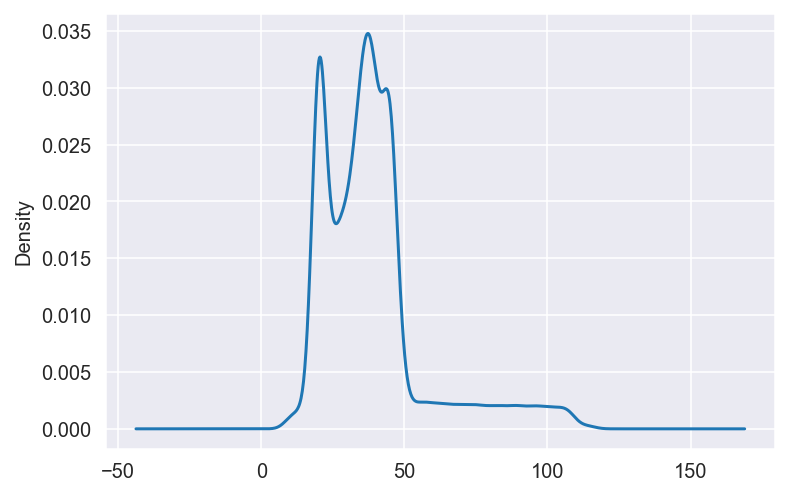

In [36]:
#data visualization
#plotting in kernal density chart
yds["distance_of_shot.1"].plot.kde()
plt.show()

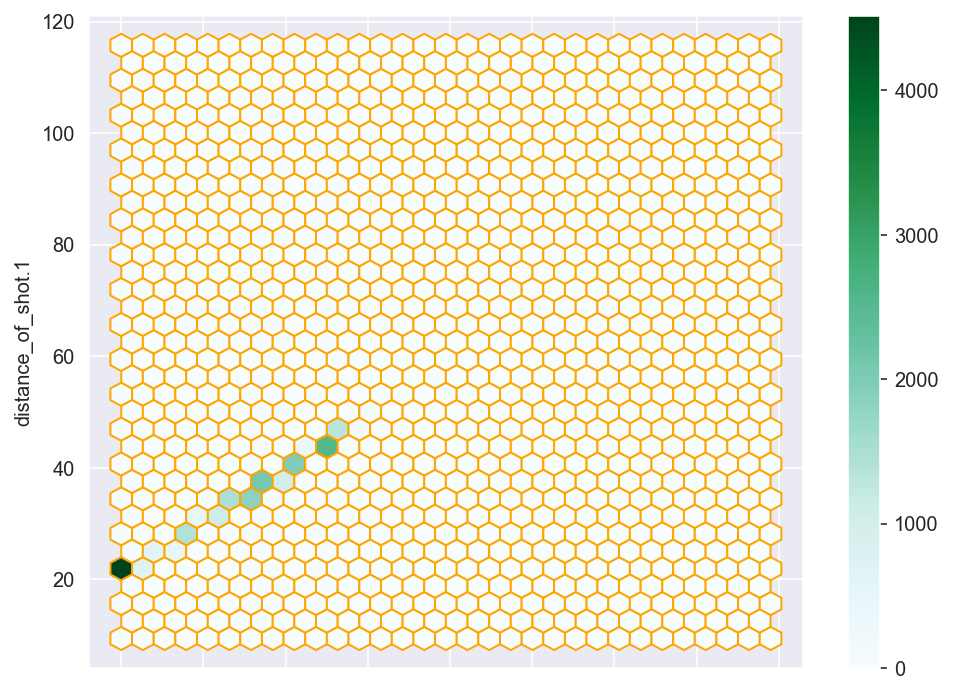

In [38]:
#plotting in hexagonal chart
yds.plot.hexbin(x='distance_of_shot', y='distance_of_shot.1',gridsize=30, figsize=(8,6),color = "orange")
plt.show()

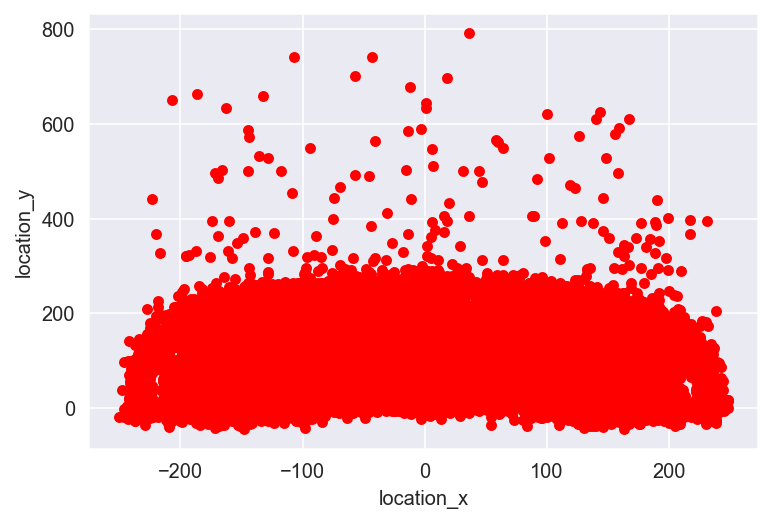

In [40]:
#plotting in scatter chart
yds.plot(kind='scatter',x='location_x',y='location_y',color='red')
plt.show()

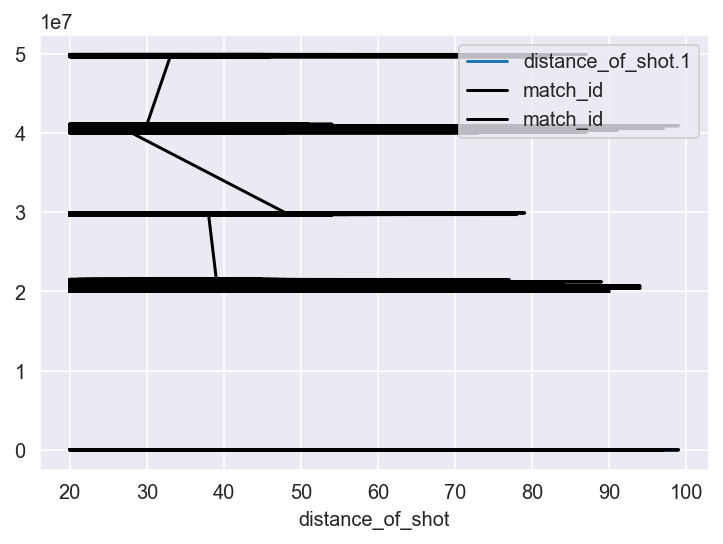

In [44]:
#line plot fo multiple columns
# gca stands for 'get current axis'
ax = plt.gca()
yds.plot(kind='line',x='distance_of_shot',y='distance_of_shot.1',ax=ax)
yds.plot(kind='line',x='distance_of_shot',y='match_id', color='black', ax=ax)